            Incidents  extreme_event
Date                                
1991-04-01          1              0
1991-05-01          0              0
1991-06-01          0              0
1991-07-01          0              0
1991-08-01          0              0
...               ...            ...
2023-09-01        170              1
2023-10-01        180              1
2023-11-01        331              1
2023-12-01        342              1
2024-01-01        172              1

[394 rows x 2 columns]
1991-04-01 00:00:00
1991-04-01 00:00:00
<class 'NoneType'>
            Incidents  extreme_event
Date                                
1995-02-01          1              0
1995-03-01          0              0
1995-04-01          0              0
1995-05-01          0              0
1995-06-01          0              0
...               ...            ...
2023-09-01         95              1
2023-10-01         68              0
2023-11-01         83              1
2023-12-01         81        

fruits and vegetables
nuts, nut products and seeds
cereals and bakery products
fish and fish products
meat and meat products (other than poultry)
herbs and spices
cereals
poultry meat and poultry meat products
crustaceans and products thereof
bovine
TimeSerie        object
Algorithm        object
c-index          object
accuracy        float64
precision       float64
recall          float64
f1              float64
Roc-Auc          object
Distribution     object
dtype: object


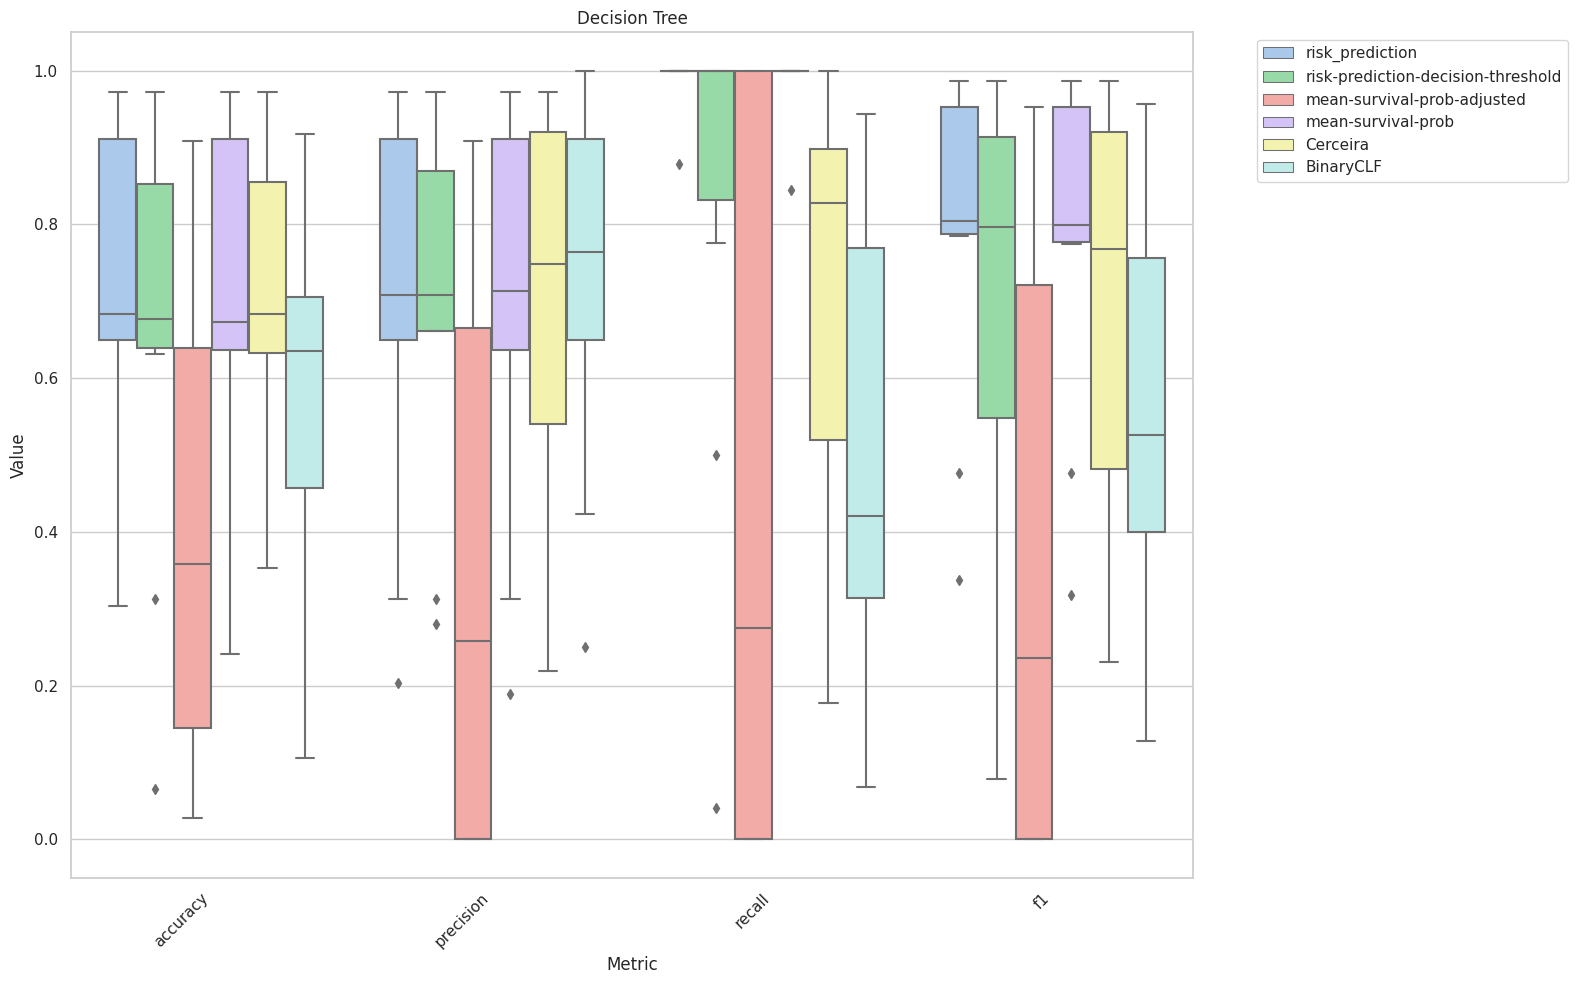

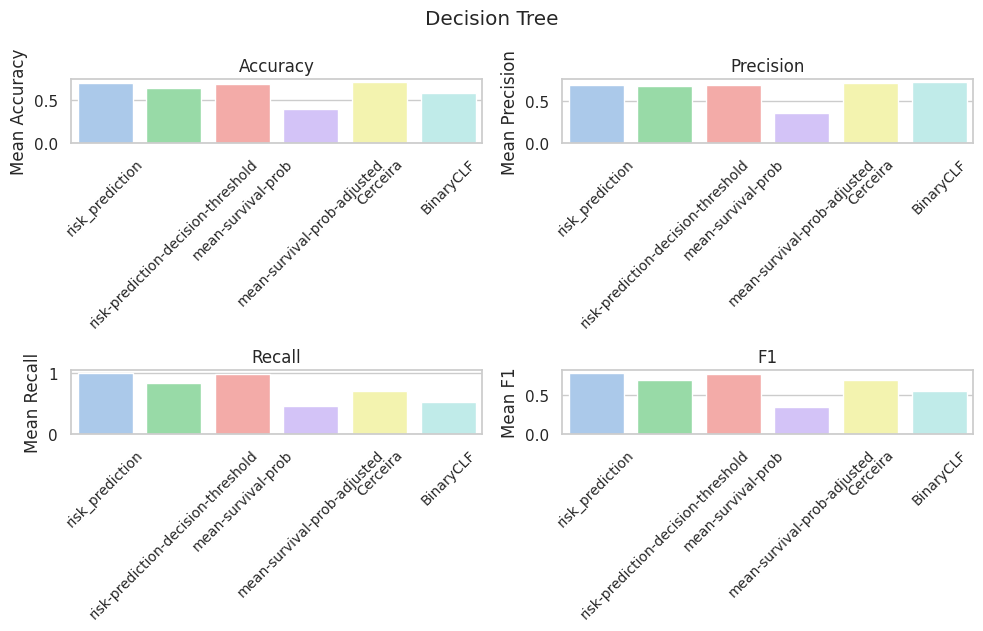

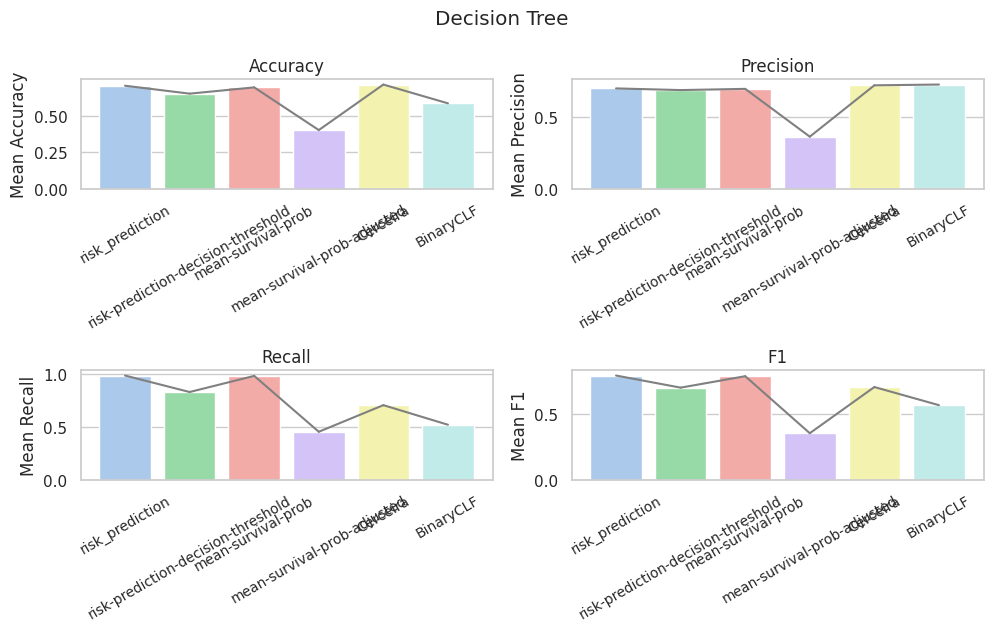

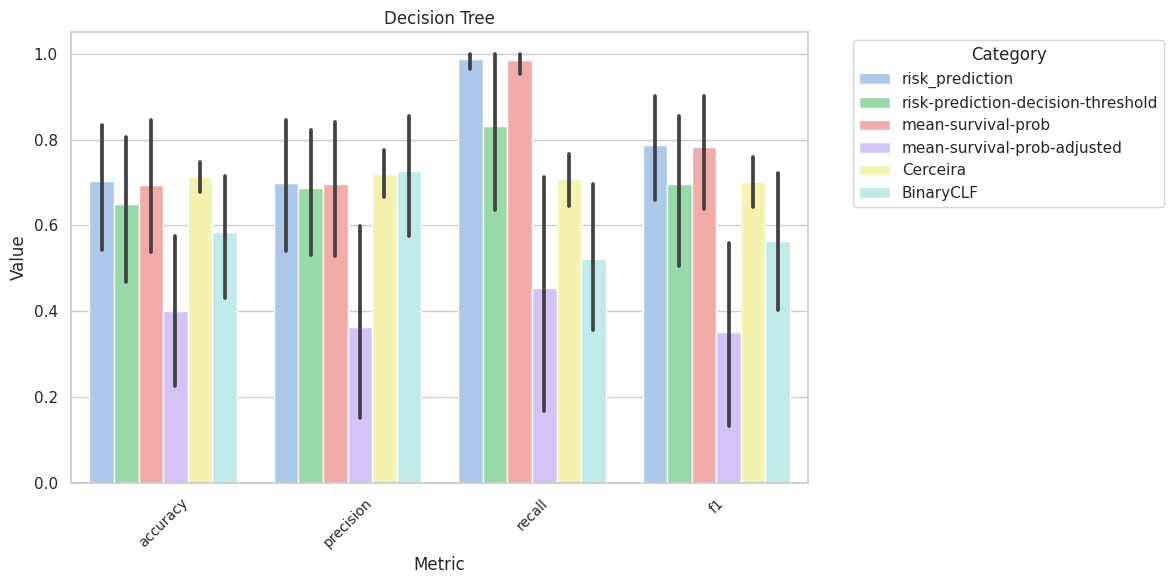

fruits and vegetables
nuts, nut products and seeds
cereals and bakery products
fish and fish products
meat and meat products (other than poultry)
herbs and spices
cereals
poultry meat and poultry meat products
crustaceans and products thereof
bovine
TimeSerie        object
Algorithm        object
c-index          object
accuracy        float64
precision       float64
recall          float64
f1              float64
Roc-Auc          object
Distribution     object
dtype: object


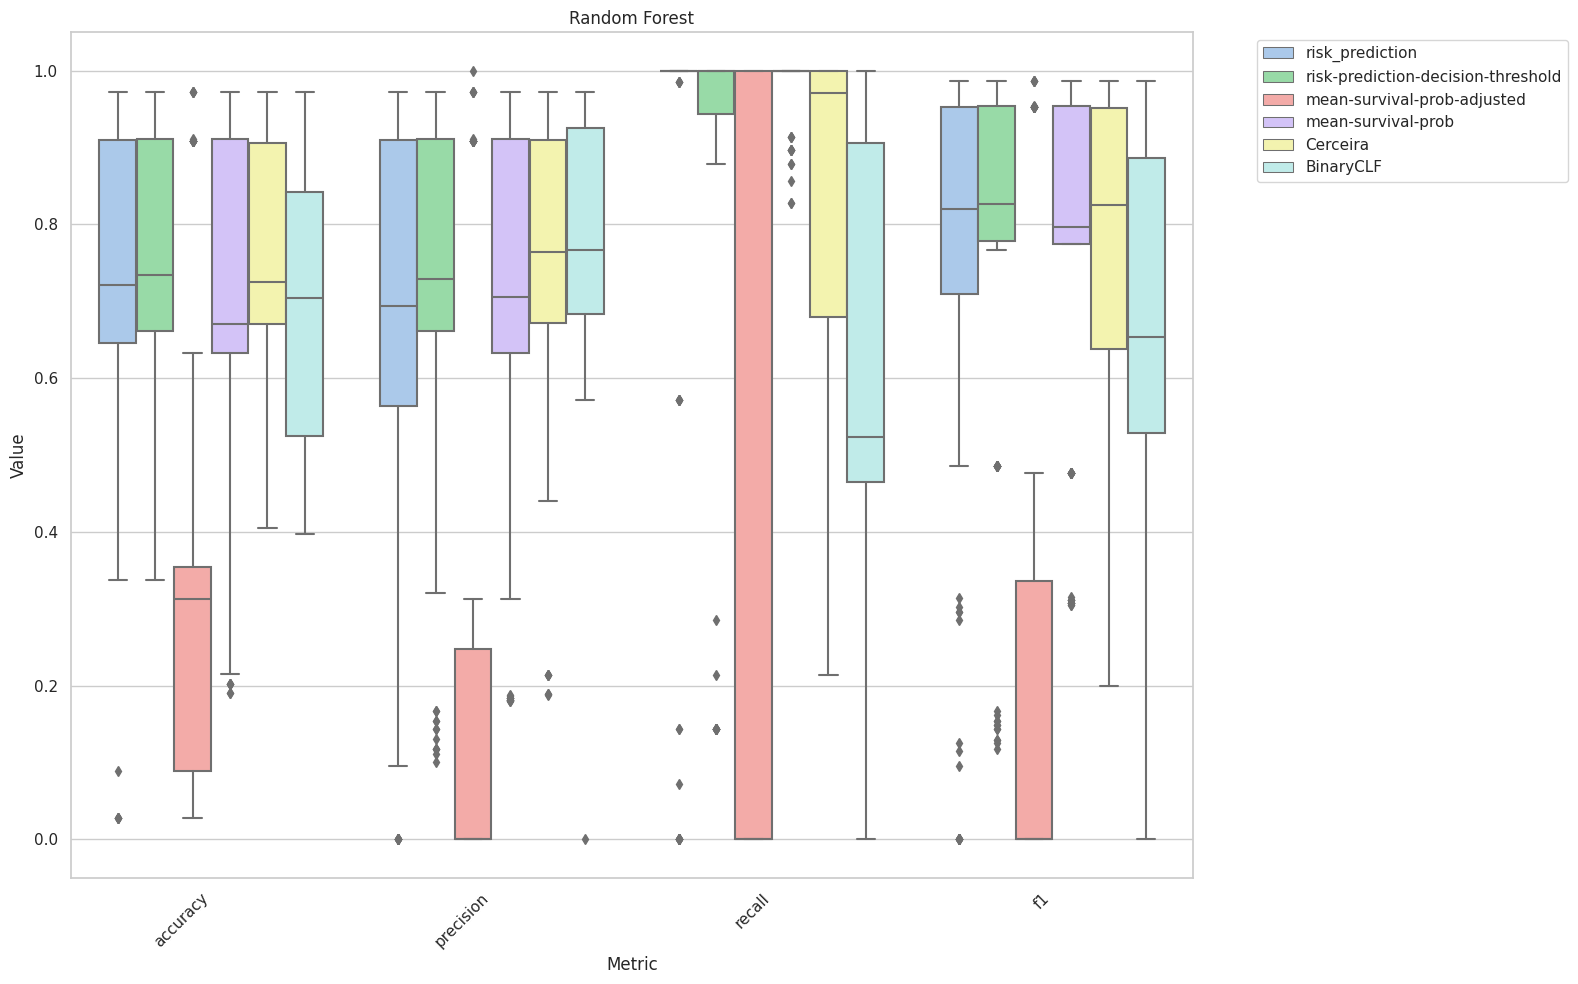

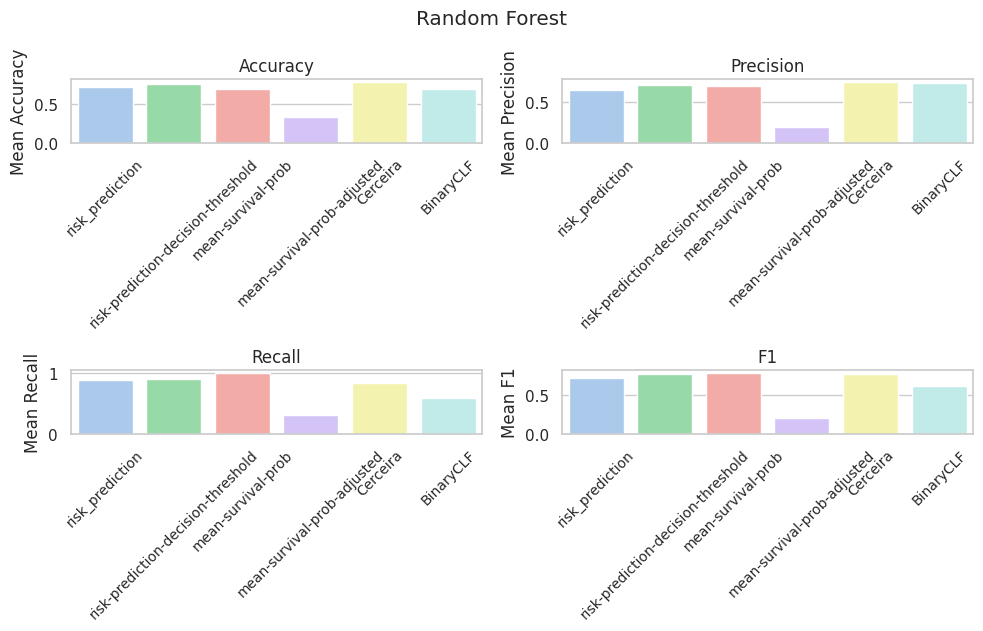

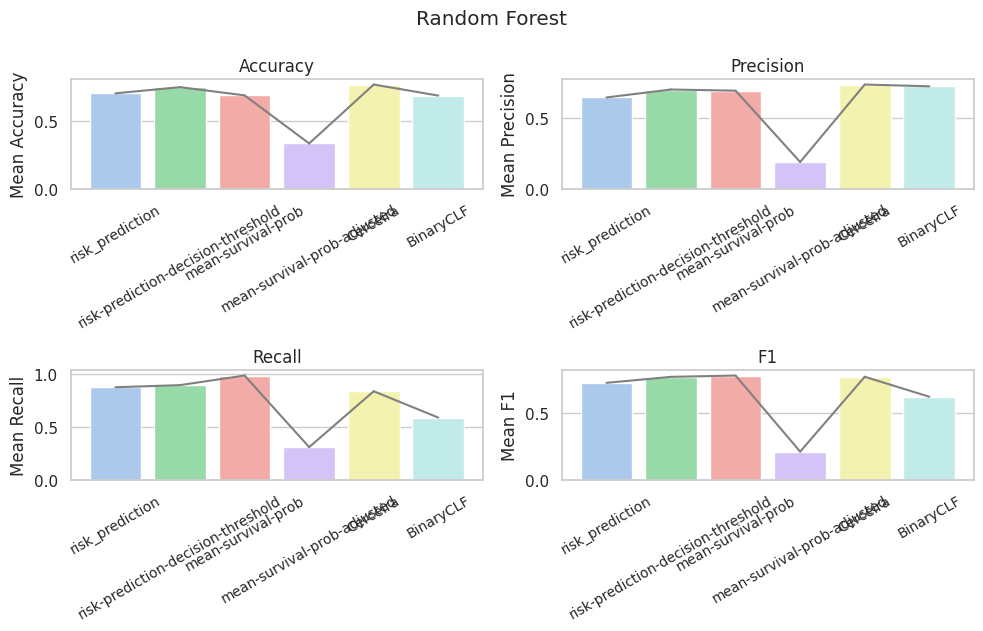

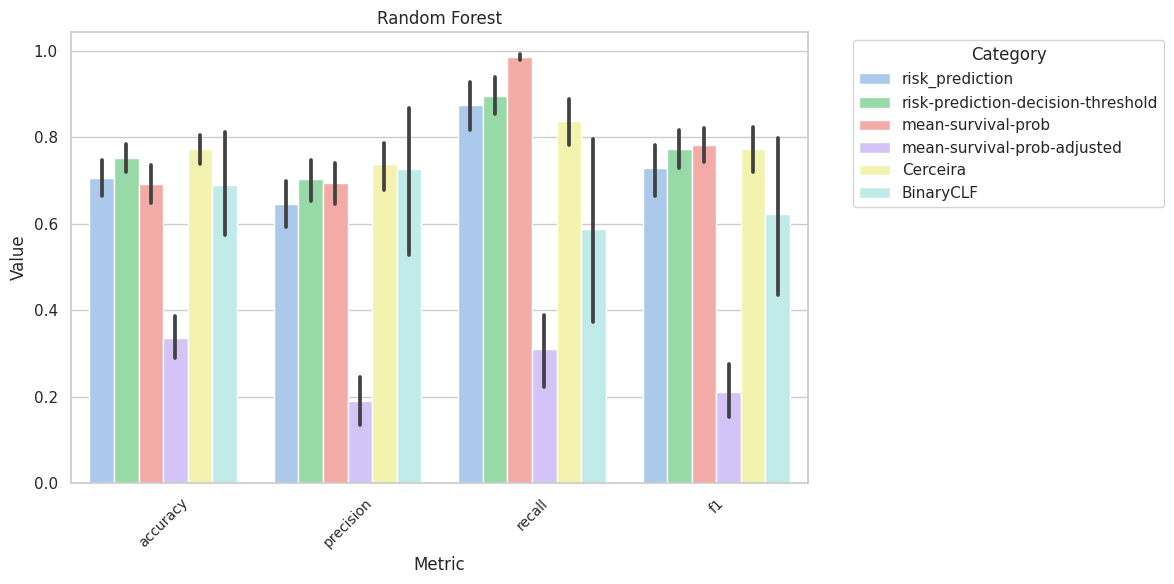

fruits and vegetables
nuts, nut products and seeds
cereals and bakery products
fish and fish products
meat and meat products (other than poultry)
herbs and spices
cereals
poultry meat and poultry meat products
crustaceans and products thereof
bovine
TimeSerie        object
Algorithm        object
c-index          object
accuracy        float64
precision       float64
recall          float64
f1              float64
Roc-Auc          object
Distribution     object
dtype: object


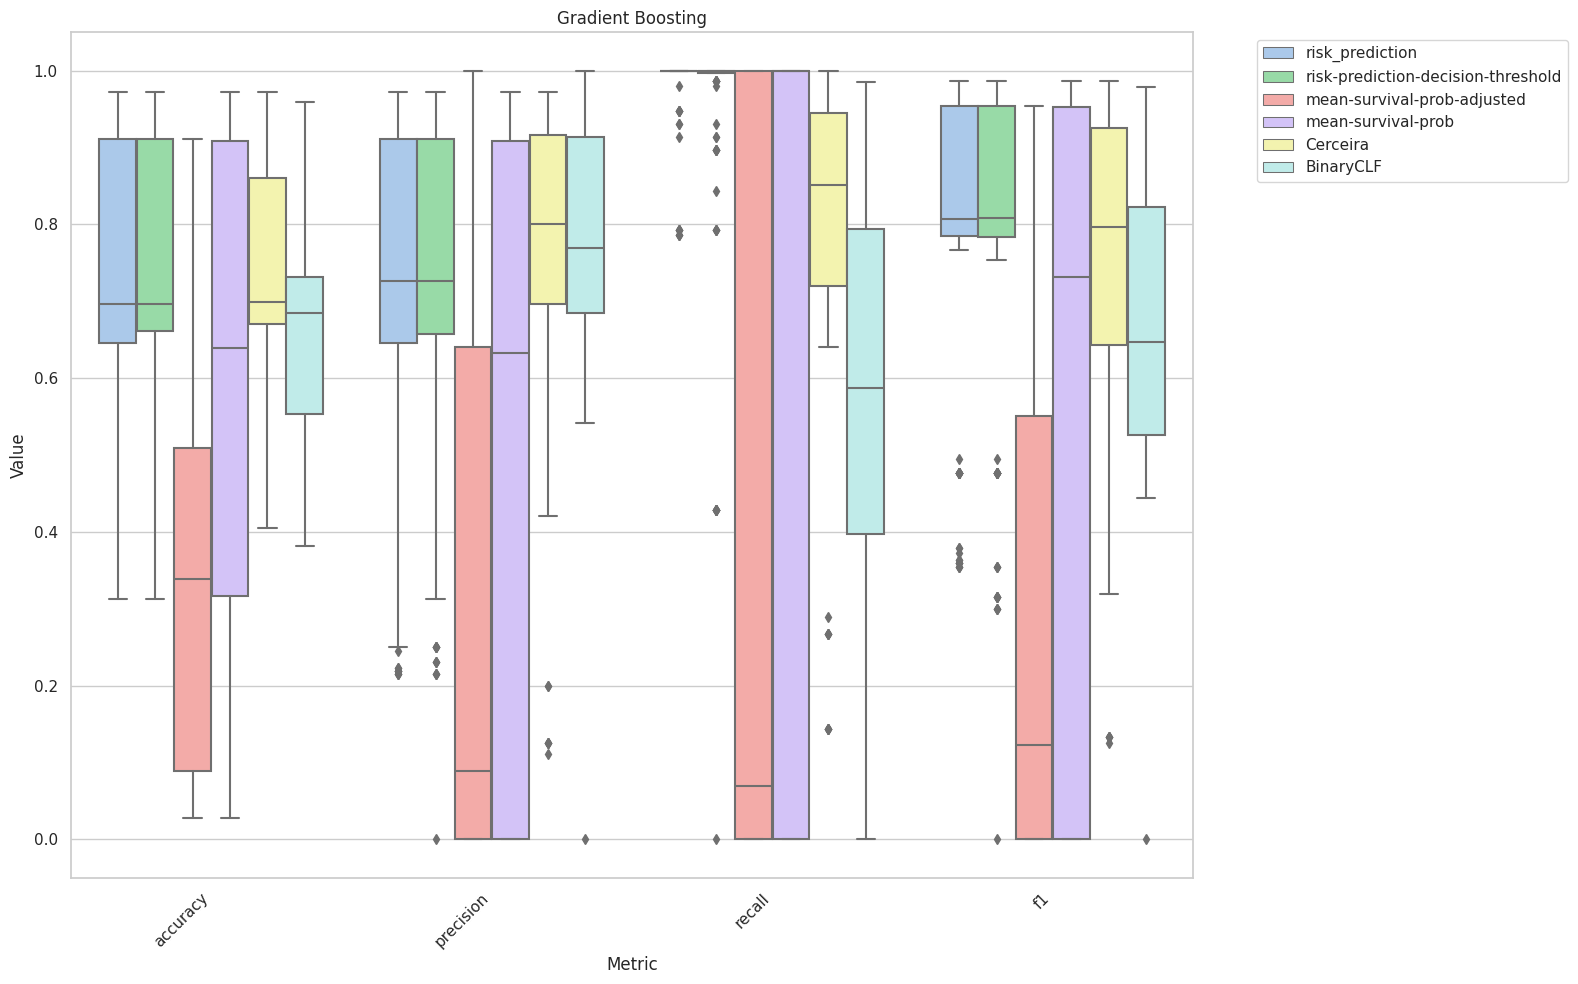

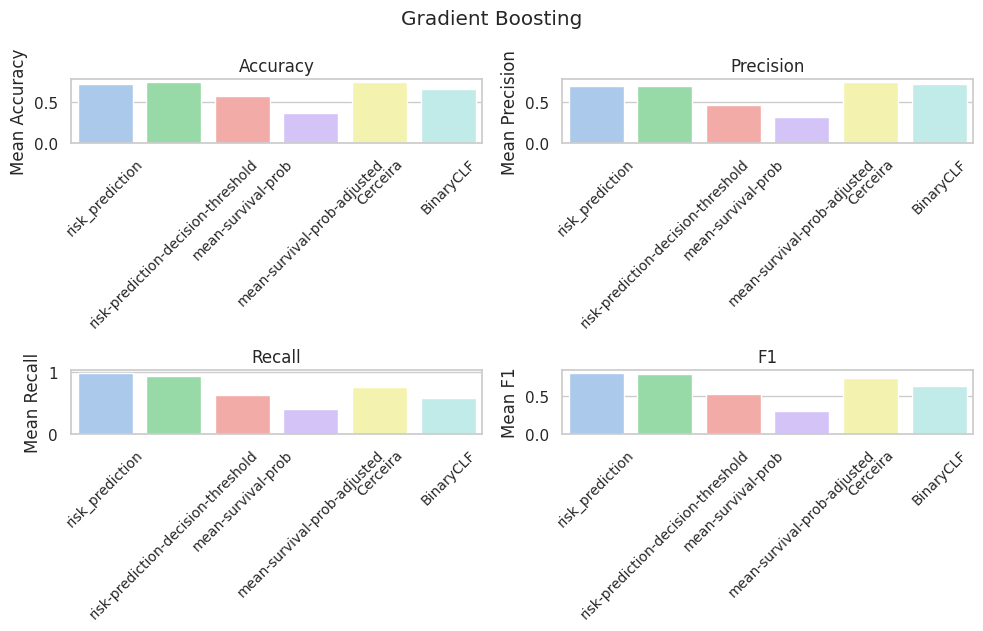

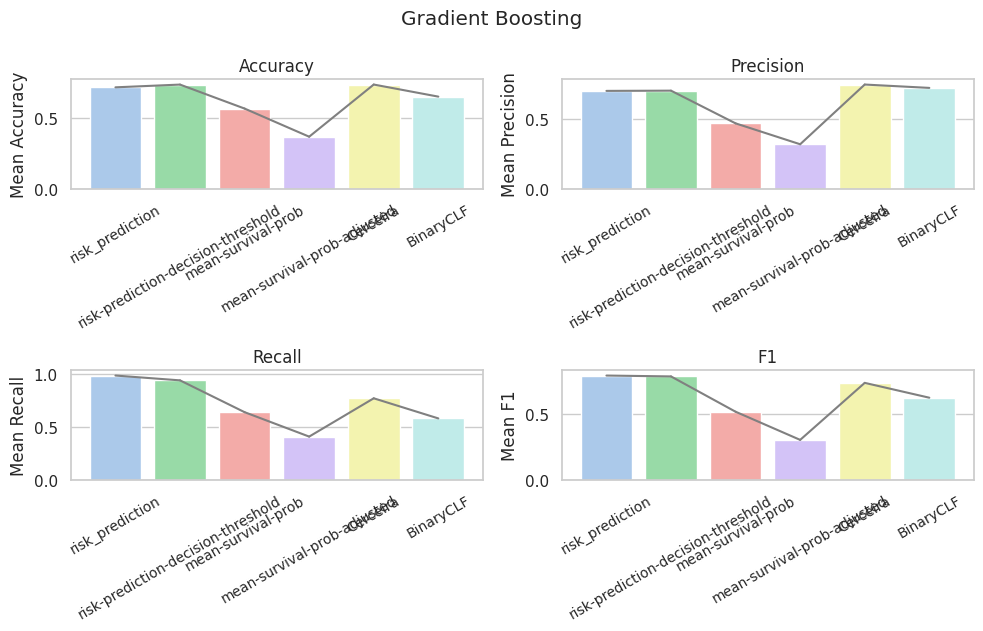

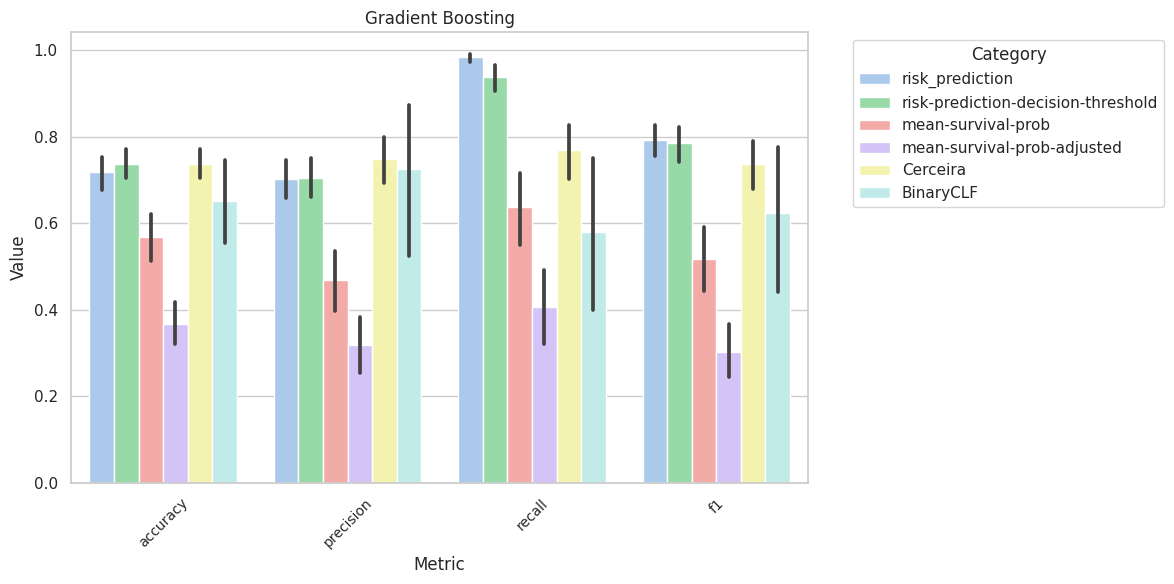

fruits and vegetables
nuts, nut products and seeds
cereals and bakery products
fish and fish products
meat and meat products (other than poultry)
herbs and spices
cereals
poultry meat and poultry meat products
crustaceans and products thereof
bovine
TimeSerie        object
Algorithm        object
c-index          object
accuracy        float64
precision       float64
recall          float64
f1              float64
Roc-Auc          object
Distribution     object
dtype: object


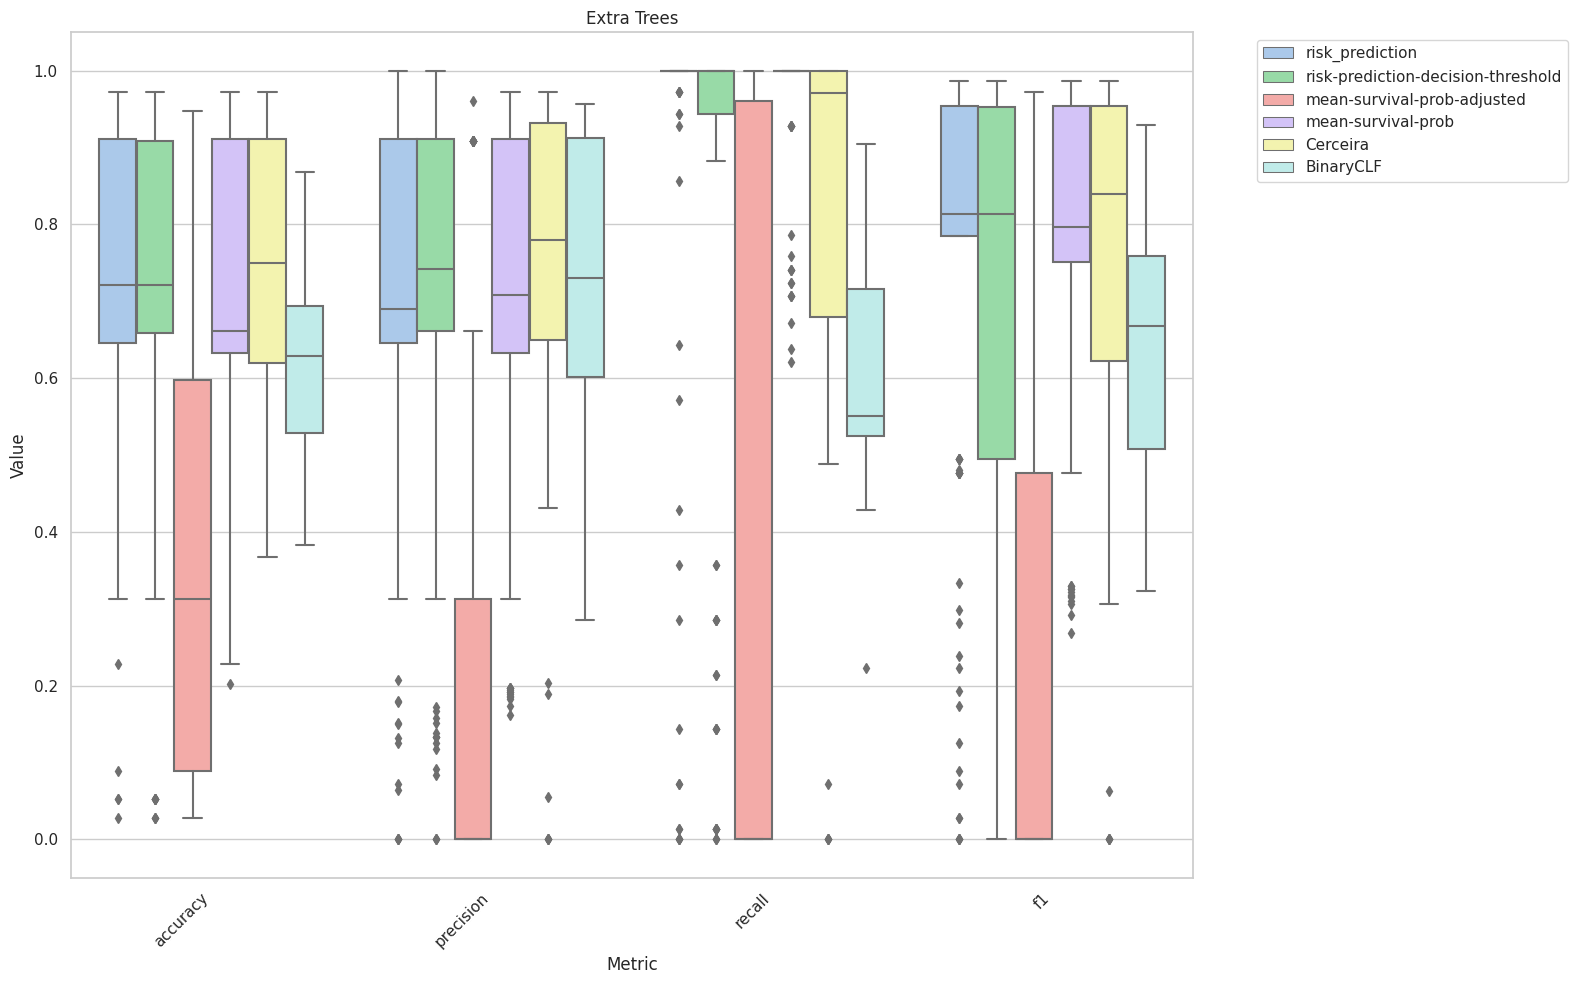

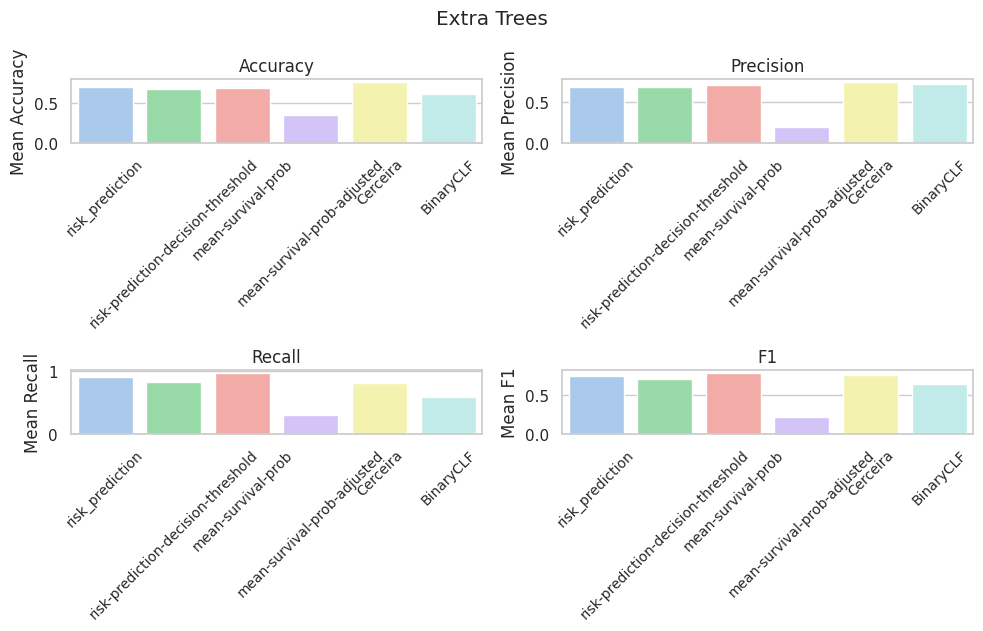

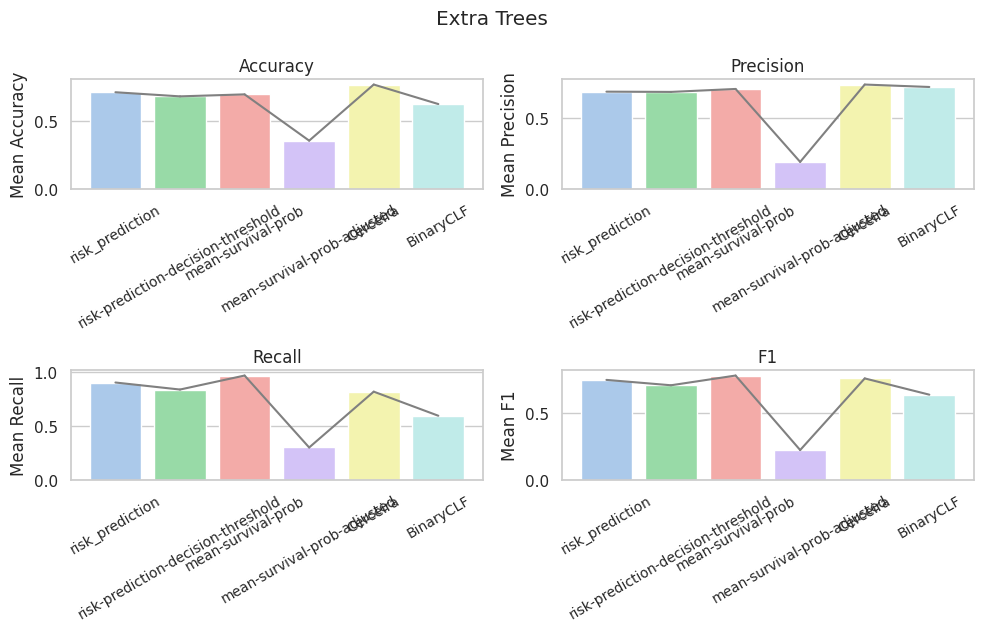

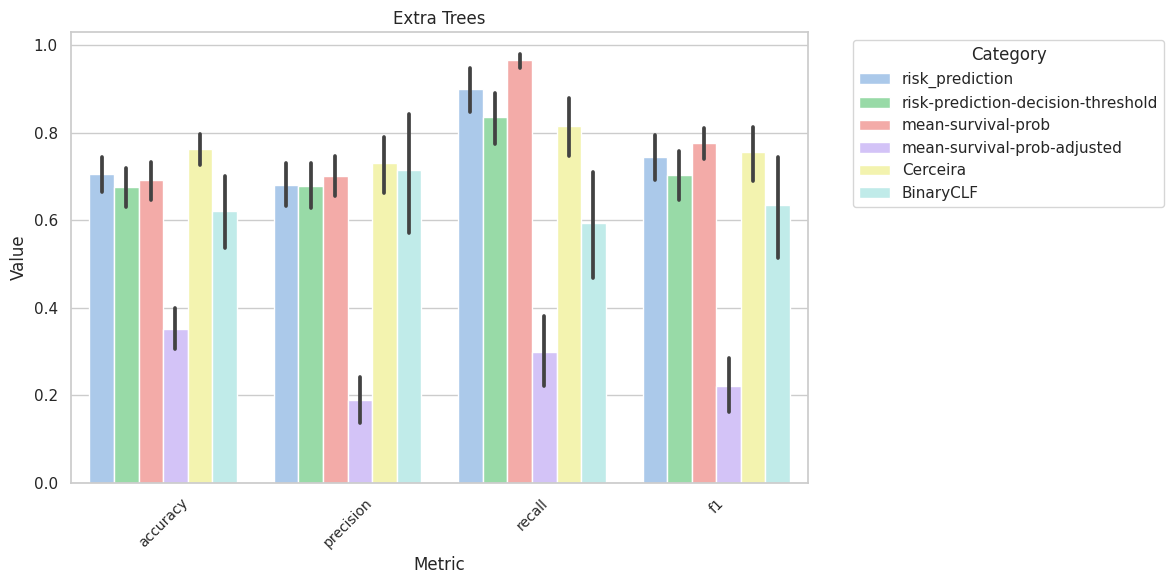

fruits and vegetables
nuts, nut products and seeds
cereals and bakery products
fish and fish products
meat and meat products (other than poultry)
herbs and spices
cereals
poultry meat and poultry meat products
crustaceans and products thereof
bovine
TimeSerie        object
Algorithm        object
c-index          object
accuracy        float64
precision       float64
recall          float64
f1              float64
Roc-Auc          object
Distribution     object
dtype: object


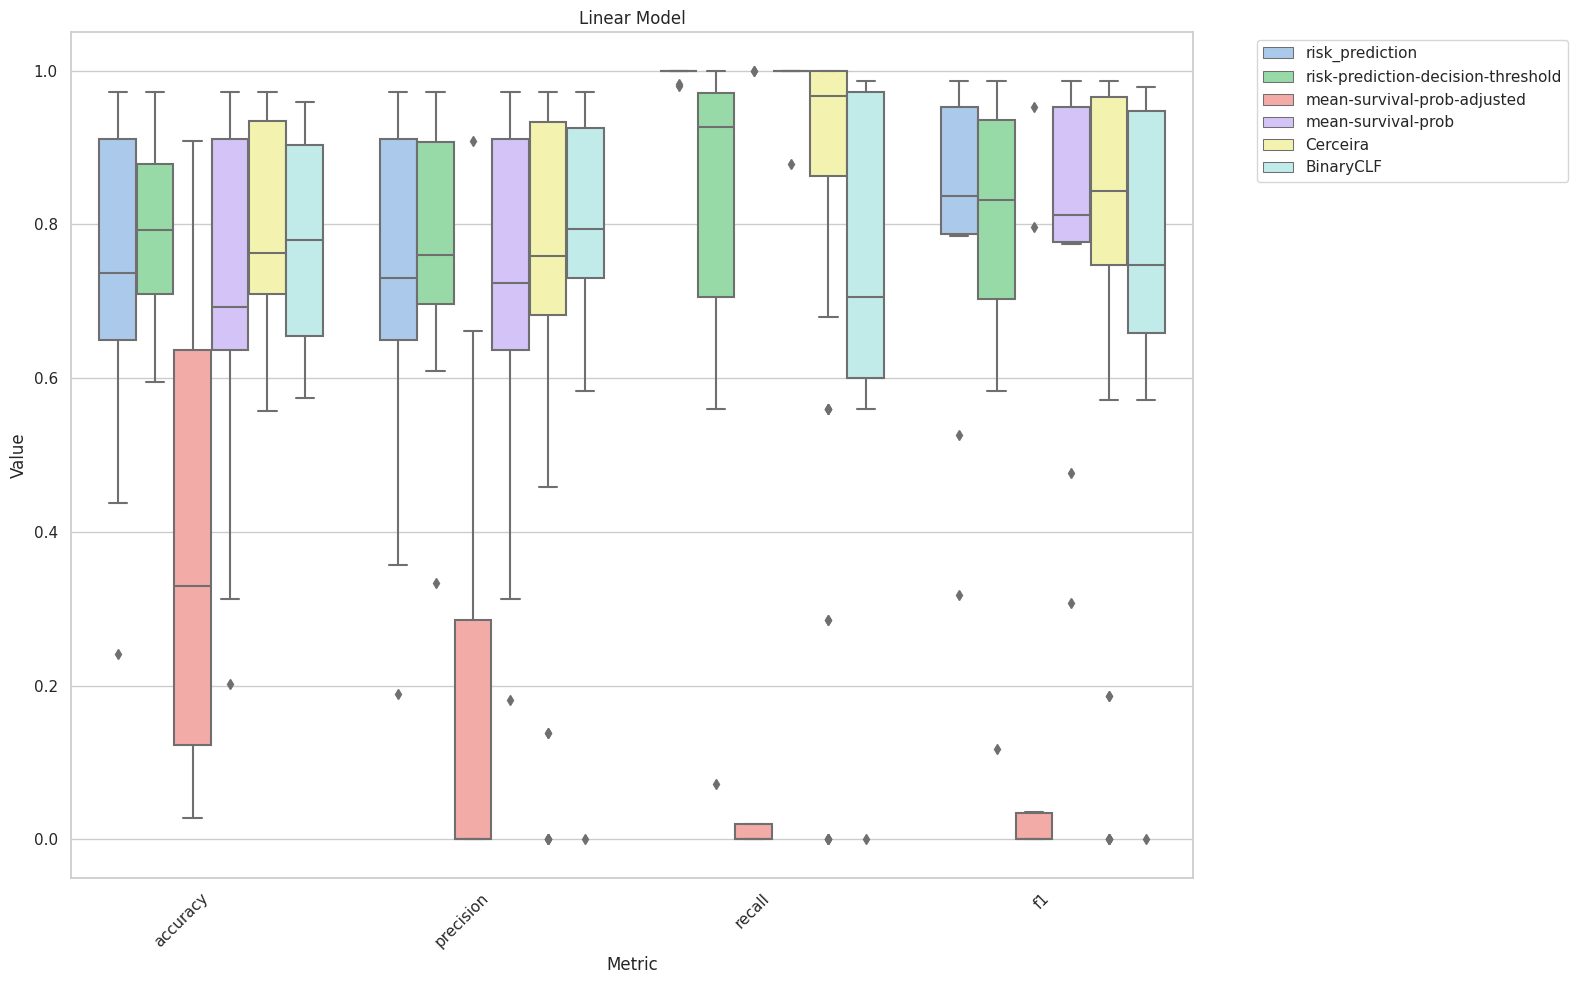

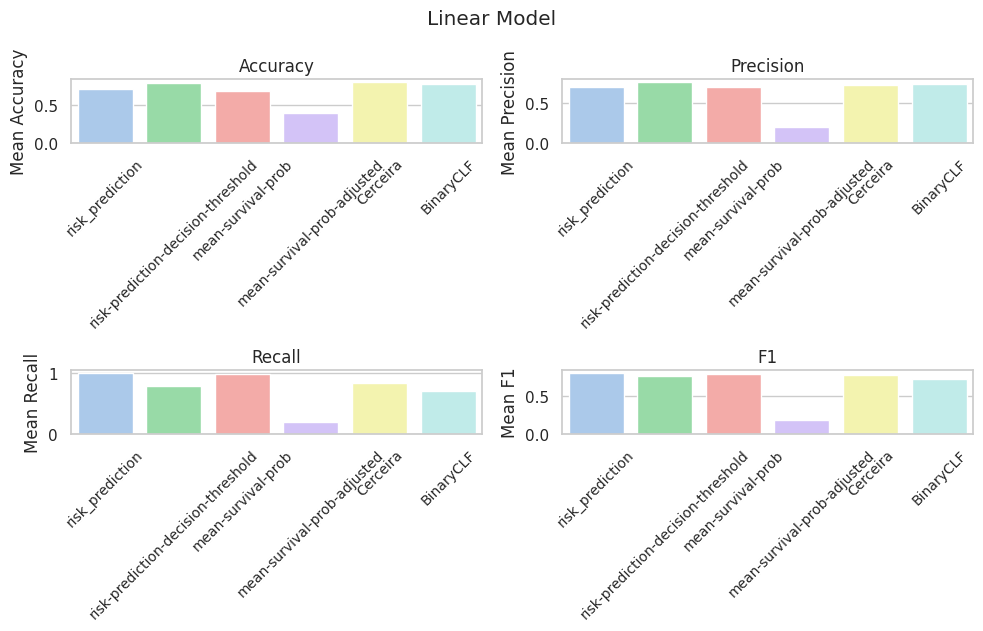

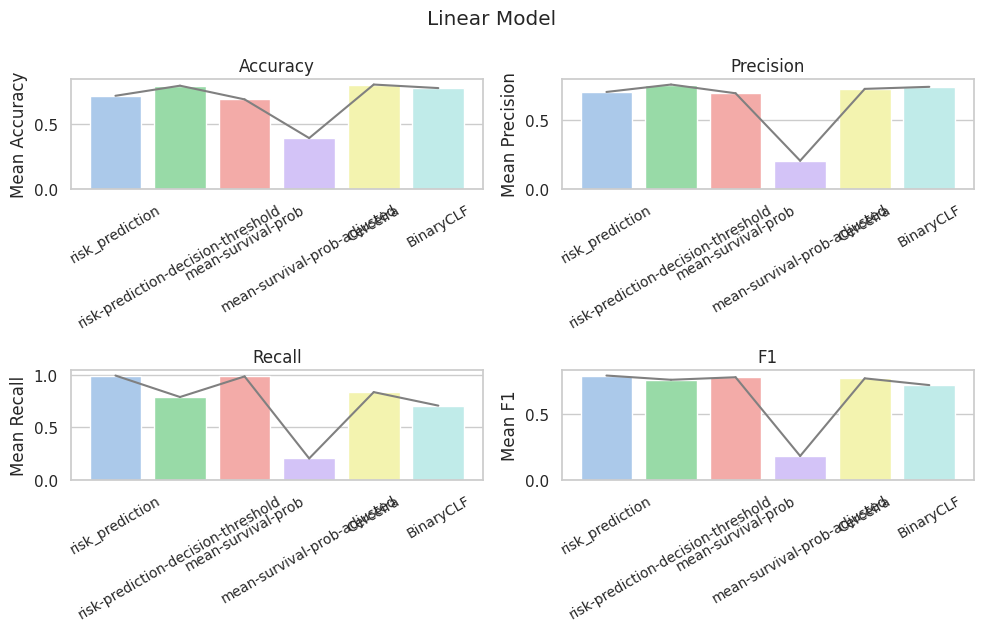

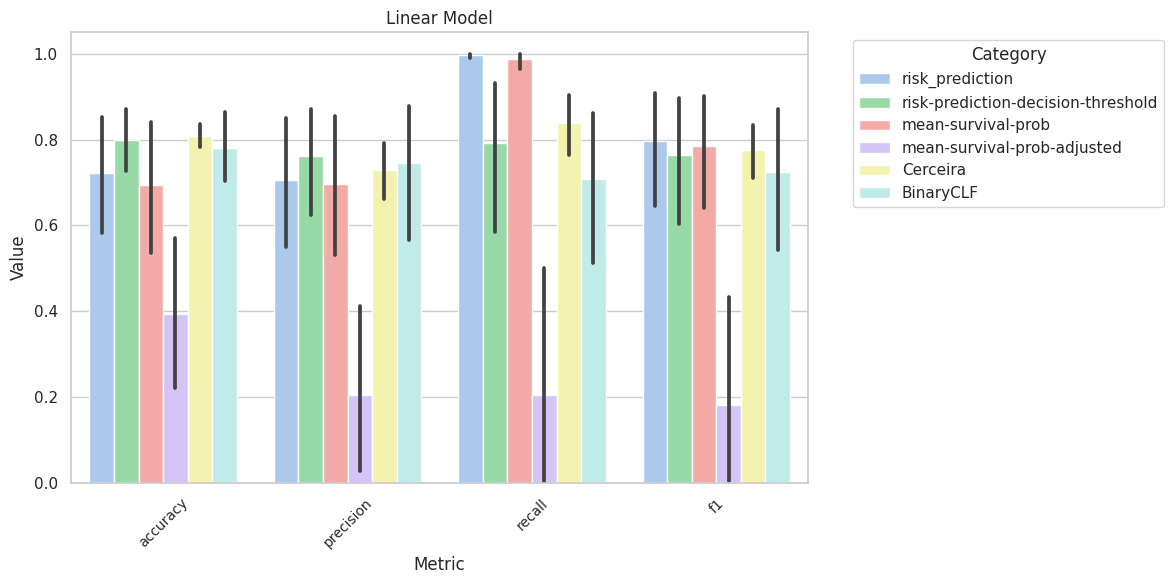

fruits and vegetables
nuts, nut products and seeds
cereals and bakery products
fish and fish products
meat and meat products (other than poultry)
herbs and spices
cereals
poultry meat and poultry meat products
crustaceans and products thereof
bovine
TimeSerie        object
Algorithm        object
c-index          object
accuracy        float64
precision       float64
recall          float64
f1              float64
Roc-Auc          object
Distribution     object
dtype: object


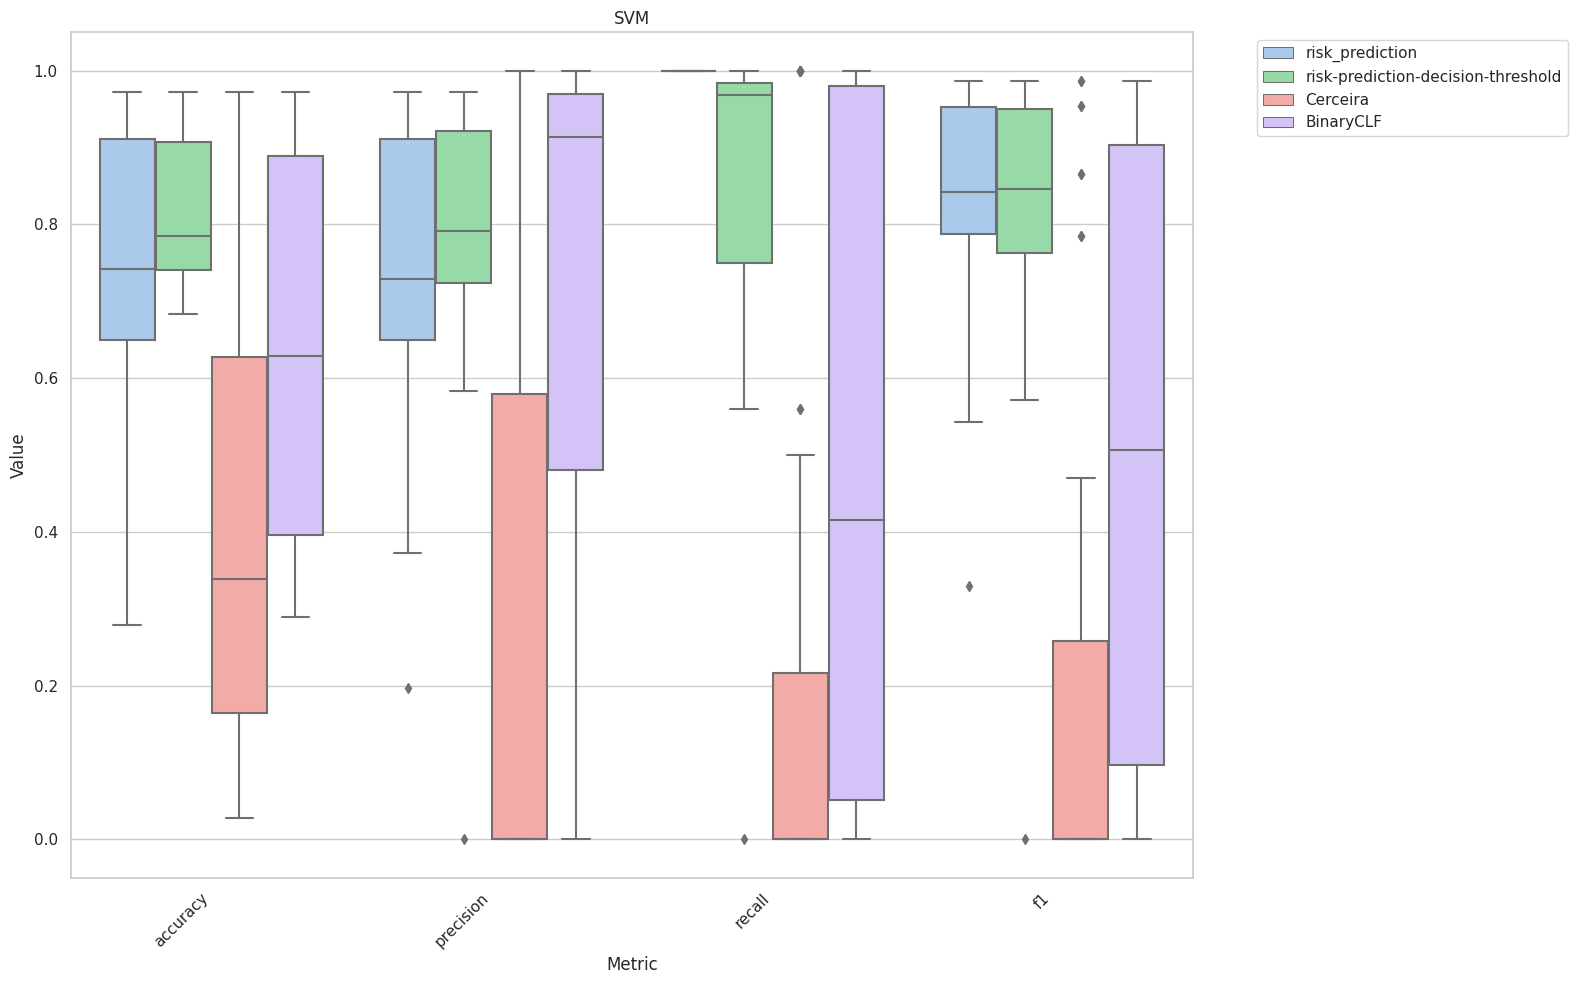

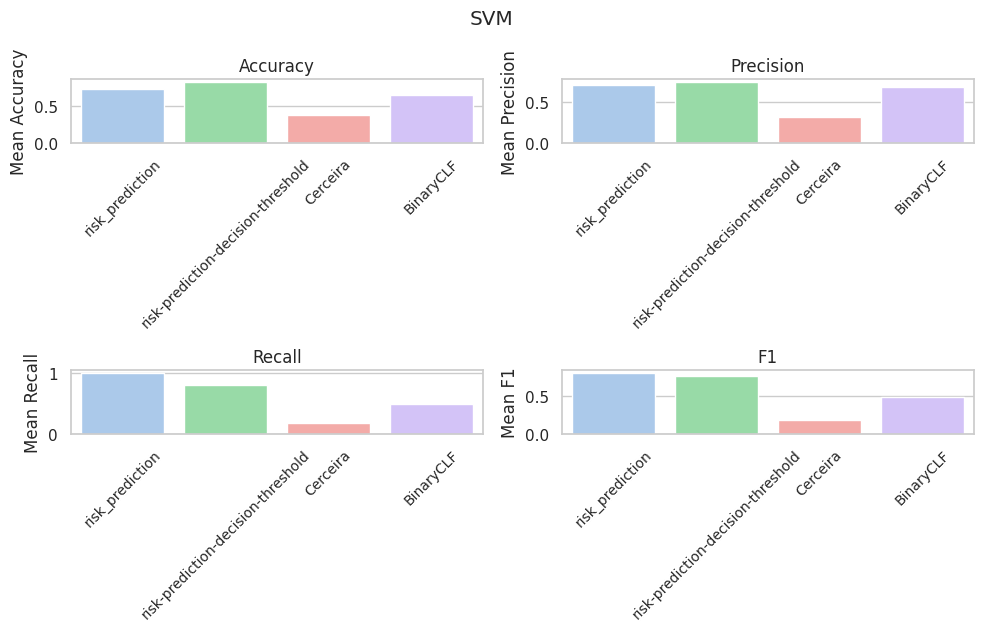

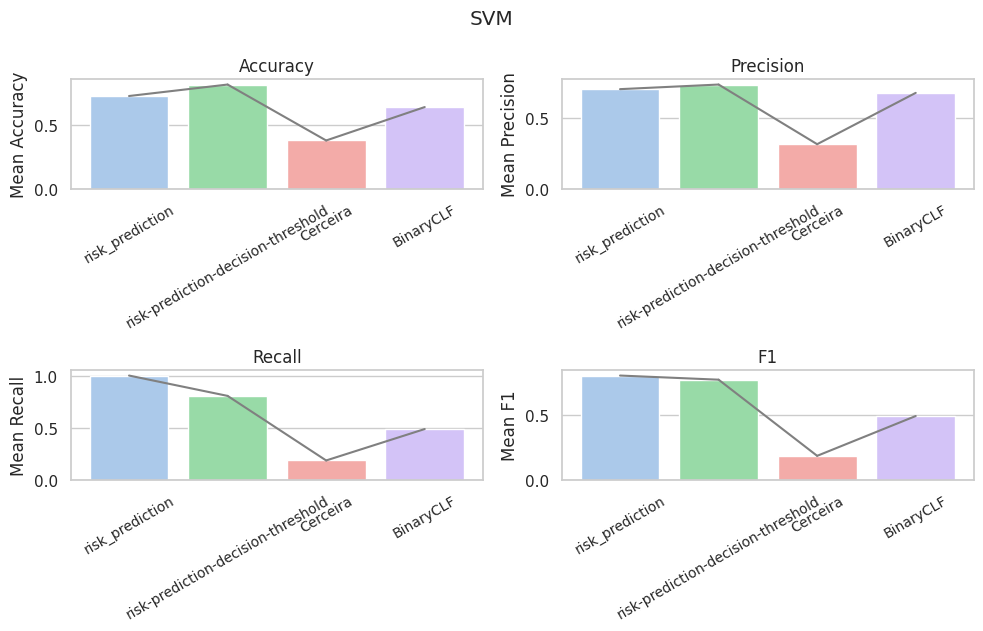

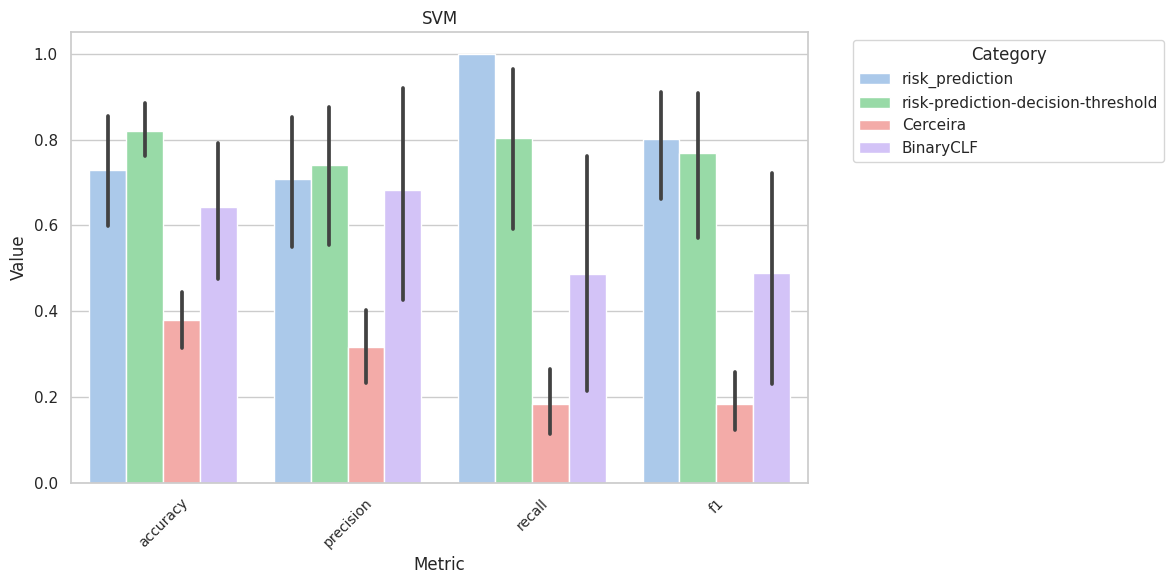

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sksurv.util import Surv 
from sksurv.tree import SurvivalTree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sksurv.ensemble import ExtraSurvivalTrees, RandomSurvivalForest
from sksurv.util import Surv
#from lightgbm import LGBMRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.svm import NaiveSurvivalSVM, FastKernelSurvivalSVM, FastSurvivalSVM

import tsfel
import warnings
import datetime 
from datetime import datetime
import io 
from tabulate import tabulate

import yaml
import sys
import json


import pickle 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from scipy.stats import norm, laplace, logistic, gumbel_r, lognorm, cauchy, genextreme 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, ExtraTreeClassifier
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.linear_model import CoxnetSurvivalAnalysis

import os 
import seaborn as sns 
import matplotlib.pyplot as plt 


###########################################################################################################################
# Dataset preprocessing functions
###########################################################################################################################



# Filter all warnings
warnings.filterwarnings("ignore")

def create_dataframe(num_lags, numbers, real_value, extreme_event, start, stop, duration):
    """
    Create a pandas DataFrame with lag columns and additional metadata.

    Parameters:
    - num_lags (int): Number of lag columns to create.
    - numbers (list): List of numerical values from which lag columns are derived.
    - real_value (list): List of real values to be included in the DataFrame.
    - extreme_event (list): List of extreme event indicators to be included.
    - start (list): List of start dates to be included.
    - stop (list): List of stop dates to be included.
    - duration (list): List of durations to be included.

    Returns:
    - df_new (pandas.DataFrame): A DataFrame containing lag columns, real_value,
      extreme_event, start_date, stop_date, and duration.

    Example Usage:
    num_lags = 3
    numbers = [10, 20, 30, 40, 50]
    real_value = [0.5, 0.6, 0.7, 0.8, 0.9]
    extreme_event = [False, False, True, True, False]
    start = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']
    stop = ['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06']
    duration = [2, 2, 2, 2, 2]
    df = create_dataframe(num_lags, numbers, real_value, extreme_event, start, stop, duration)
    """
    # Initialize a dictionary to store the lag columns
    lag_columns = {}

    # Create lag columns in the dictionary
    for lag in range(1, num_lags + 1):
        lag_columns[f'lag_{lag}'] = [arr[lag - 1] for arr in numbers]

    # Add other columns to the dictionary
    lag_columns['real_value'] = real_value
    lag_columns['extreme_event'] = extreme_event
    lag_columns['start_date'] = start
    lag_columns['stop_date'] = stop
    lag_columns['duration'] = duration

    # Convert the dictionary to a dataframe
    df_new = pd.DataFrame(lag_columns)

    return df_new

# the old name of this function was -> country_dataframe_cr
def duration_calculation(window_size, df, columns):
    """
    Calculate event durations and create a DataFrame with lag columns and additional metadata.

    Parameters:
    - window_size (int): Size of the time window for calculations.
    - df (pandas.DataFrame): DataFrame containing time series data.
    - columns (list): List of column names, where columns[0] corresponds to the time series data,
      and columns[1] corresponds to the event indicator.

    Returns:
    - df_new (pandas.DataFrame): A DataFrame containing lag columns, real_value,
      extreme_event, start_date, stop_date, and duration.

    Example Usage:
    window_size = 5
    data = pd.DataFrame({'Timestamp': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
                          'Value': [10, 20, 30, 40, 50],
                          'Event': [0, 0, 1, 1, 0]})
    columns = ['Value', 'Event']
    df = duration_calculation(window_size, data, columns)
    """
    #ts = df[df['country']==country]

    ts = df[columns].squeeze()
    print(ts)

    # Define the window size and the number of output steps
    output_steps = 1

    # Create input-output pairs from the time series using a sliding window
    numbers = []
    real_value = []
    extreme_event = []
    duration = []
    start = []
    stop = []

    print(ts.index[0])  
    print(type(print(ts.index[0])  ))
    start_date = ts.index[0]

    for i in range(len(ts)-window_size):
        
        numbers.append(ts[columns[0]][i:i+window_size].values)
        real_value.append(ts.iloc[i+window_size+output_steps-1][columns[0]])
        extreme_event.append(ts.iloc[i+window_size+output_steps-1][columns[1]])

        stop_date = ts.index[i+window_size+output_steps-1] 

        if ts.iloc[i+window_size+output_steps-1][columns[1]] == 1:
          
          # Calculate the duration of the event
          duration.append((stop_date - start_date).days) #.total_seconds()

          #change the start date 
          start_date = ts.index[i+window_size+output_steps-1]

        else: 
          # Calculate the duration of the event
          duration.append((stop_date - start_date).days) #days

        # Extract the start and stop date of the time window
        start.append(start_date)
        stop.append(stop_date)
        

    # Convert the lists to a dataframe    
    df_new = create_dataframe(num_lags=window_size, 
                              numbers=numbers, 
                              real_value=real_value, 
                              extreme_event=extreme_event, 
                              start=start, 
                              stop=stop, 
                              duration=duration)

    return df_new


def extract_features(df, timesteps):
    """
    Extract time series features from a DataFrame.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing time series data.
    - timesteps (int): Number of time steps to consider for feature extraction.

    Returns:
    - features_df (pandas.DataFrame): DataFrame containing extracted time series features.

    Example Usage:
    timesteps = 10
    features_df = extract_features(df, timesteps)
    """

    # Initialize empty lists to store the extracted features
    mean_list = []
    std_list = []
    minimum_list = []
    maximum_list = []
    percentiles_a_list = []
    percentiles_b_list = []
    percentiles_c_list = []
    skewness_list = []
    kurtosis_list = []
    autocorr_list = []
    partial_autocorr_list = []
    power_spectrum_list = []
    rolling_mean_list = []
    rolling_std_list = []
    #real_values = []

    # Iterate over each step in the time series dataset
    for i in range(len(df)):
        # Extract features using data up to the current step
        data_up_to_current_step = df['Incidents'][:i+timesteps]

        # Compute statistical features
        mean = data_up_to_current_step.mean()
        std = data_up_to_current_step.std()
        minimum = data_up_to_current_step.min()
        maximum = data_up_to_current_step.max()
        percentiles_a = data_up_to_current_step.quantile(0.25)
        percentiles_b = data_up_to_current_step.quantile(0.5)
        percentiles_c = data_up_to_current_step.quantile(0.75)
        skewness = data_up_to_current_step.skew()
        kurtosis = data_up_to_current_step.kurtosis()
        #real_value = df['Incidents'].iloc[i]

        # Compute autocorrelation features
        autocorr = data_up_to_current_step.autocorr()
        #partial_autocorr = pd.Series(sm.tsa.stattools.pacf(data_up_to_current_step))

        # Compute frequency domain features
        fft = np.fft.fft(data_up_to_current_step)
        power_spectrum = np.abs(fft) ** 2

        # Compute time domain features
        #rolling_mean = data_up_to_current_step.rolling(window=i+1).mean()
        #rolling_std = data_up_to_current_step.rolling(window=i+1).std()

        # Append the extracted features to the respective feature lists
        mean_list.append(np.round(mean,2))
        std_list.append(np.round(std,2))
        minimum_list.append(np.round(minimum,2))
        maximum_list.append(np.round(maximum,2))
        percentiles_a_list.append(np.round(percentiles_a,2))
        percentiles_b_list.append(np.round(percentiles_b,2))
        percentiles_c_list.append(np.round(percentiles_c,2))
        skewness_list.append(np.round(skewness,2))
        kurtosis_list.append(np.round(kurtosis,2))
        autocorr_list.append(np.round(autocorr,2))
        #partial_autocorr_list.append(partial_autocorr)
        power_spectrum_list.append(power_spectrum)
        #rolling_mean_list.append(rolling_mean)
        #rolling_std_list.append(rolling_std)
        #real_values.append(real_value)

    # Create a new DataFrame for the extracted features
    features_df = pd.DataFrame({
        'Mean': mean_list,
        'Standard Deviation': std_list,
        'Minimum': minimum_list,
        'Maximum': maximum_list,
        'Percentiles_a': percentiles_a_list,
        'Percentiles_b': percentiles_b_list,
        'Percentiles_c': percentiles_c_list,
        'Skewness': skewness_list,
        'Kurtosis': kurtosis_list,
        'Autocorrelation': autocorr_list#,
        #'Partial Autocorrelation': partial_autocorr_list,
        #'Power Spectrum': power_spectrum_list,
        #'Rolling Mean': rolling_mean_list,
        #'Rolling Standard Deviation': rolling_std_list
        #'Real_value': real_values,
        #'Date': df['Date']
    })

    return features_df 


def tsfel_feature_extraction(kind):

    '''
    kind(str): 'temporal', 'statistical' or 'spectral'
    '''

    if kind == 'temporal':
        cfg_file = tsfel.get_features_by_domain(kind)               # All features will be extracted.
        return cfg_file
    if kind == 'statistical':
        cfg_file = tsfel.get_features_by_domain(kind)               # All features will be extracted.
        return cfg_file
    if kind == 'spectral':
        cfg_file = tsfel.get_features_by_domain(kind)               # All features will be extracted.
        return cfg_file


def process_dataframes(dataset, quantile, test_size):
    
    dataframes = {}

    for name, values in dataset.items():
        dataframes[name] = pd.DataFrame(values)
    
    for name, values in dataframes.items():
        values['Date'] = pd.to_datetime(values['Date'])

        n_obs_train = int(np.round(values.shape[0]*(1-test_size)))
        n_obs_test = int(np.round(values.shape[0]*(test_size)))

        # Define the threshold for extreme events
        train_threshold = values['Incidents'].iloc[:n_obs_train].quantile(quantile)
        test_threshold = values['Incidents'].iloc[-n_obs_test:].quantile(quantile)

        # New column to remind us the threshold 
        values['train_threshold'] = train_threshold
        values['test_threshold'] = test_threshold

        # Create the 'extreme_event' column
        values['extreme_event'] = (values['Incidents'] > train_threshold).astype(int)

        # Set Date as index 
        values.set_index('Date', inplace=True)
    
    return dataframes


def create_survival_analysis_ready_data(datasets, timesteps):

    survival_analysis_ready_data = {}

    for name, values in datasets.items():

        new_df = duration_calculation(window_size=timesteps, 
                                df=values, 
                                columns=['Incidents', 'extreme_event'])
        
        # TOBE DELETED
        new_df['train_threshold'] = values['train_threshold'].iloc[0]
        new_df['test_threshold'] = values['test_threshold'].iloc[0]

        survival_analysis_ready_data[name] = new_df

    return survival_analysis_ready_data


def create_splitted_data(survival_data, test_size):

    splitted_data = {}

    for name, values in survival_data.items():

        validation_rows = round(values.shape[0]*test_size)

        new_df = values

        ### this is a check which is used to ensure that both in test and train sets we have at least one positive case 
        # if len(np.unique(new_df.iloc[-validation_rows:]['extreme_event'].values)) == 2 and len(np.unique(new_df.iloc[:(values.shape[0] - validation_rows)]['extreme_event'].values)) == 2:
        if len(new_df[-validation_rows:]['extreme_event'].unique()) == 2 and len(new_df[:-validation_rows]['extreme_event'].unique()) == 2:

            X_train_survival = new_df[:-validation_rows].drop(columns=['real_value', 'extreme_event', 'duration', 'start_date', 'stop_date', 'train_threshold', 'test_threshold'])
            X_test_survival = new_df[-validation_rows:].drop(columns=['real_value', 'extreme_event', 'duration', 'start_date', 'stop_date', 'train_threshold', 'test_threshold'])
            y_train_survival = Surv.from_dataframe(event='extreme_event', time='duration', data=new_df[:-validation_rows].drop(columns=['real_value']))
            y_test_survival = Surv.from_dataframe(event='extreme_event', time='duration', data=new_df[-validation_rows:].drop(columns=['real_value']))

            X_train = new_df[:-validation_rows].drop(columns=['real_value', 'extreme_event', 'duration', 'start_date', 'stop_date', 'train_threshold', 'test_threshold'])
            y_train, y_test = new_df['real_value'][:-validation_rows], new_df['real_value'][-validation_rows:]
            X_test = new_df[-validation_rows:].drop(columns=['real_value', 'extreme_event', 'duration', 'start_date', 'stop_date', 'train_threshold', 'test_threshold'])

            # Manually extracted features (meaning without using libraries)
            manual_extracted_features = extract_features(pd.DataFrame(dataframes[name]['Incidents']), timesteps=timesteps)
            X_train_mn_ext_feat = manual_extracted_features[:-validation_rows]
            # y_train_mn_ext_feat, y_test_mn_ext_feat = new_df['real_value'][:-validation_rows], new_df['real_value'][-validation_rows:]
            y_train_mn_ext_feat = Surv.from_dataframe(event='extreme_event', time='duration', data=new_df[:-validation_rows].drop(columns=['real_value']))
            y_test_mn_ext_feat = Surv.from_dataframe(event='extreme_event', time='duration', data=new_df[-validation_rows:].drop(columns=['real_value']))
            X_test_mn_ext_feat = manual_extracted_features[-validation_rows:]
            X_train_mn_ext_feat = X_train_mn_ext_feat[timesteps:]

            tsfel_extracted_features = tsfel.time_series_features_extractor(tsfel_feature_extraction(kind='statistical'), 
                                                    pd.DataFrame(dataframes[name]['Incidents']),  
                                                    window_size=11, 
                                                    overlap=0.95,
                                                    verbose=0) 
            X_train_tsfel = tsfel_extracted_features[:-validation_rows]
            # y_train_tsfel, y_test_tsfel = new_df['real_value'][:-validation_rows], new_df['real_value'][-validation_rows:]
            y_train_tsfel = Surv.from_dataframe(event='extreme_event', time='duration', data=new_df[:-validation_rows].drop(columns=['real_value']))
            y_test_tsfel = Surv.from_dataframe(event='extreme_event', time='duration', data=new_df[-validation_rows:].drop(columns=['real_value']))
            X_test_tsfel = tsfel_extracted_features[-validation_rows:]


            y_train_threshold = new_df['train_threshold'].iloc[0]
            y_test_threshold = new_df['test_threshold'].iloc[0]
            y_test_binary = (y_test > y_train_threshold).astype(int)
            y_train_binary = (y_train > y_train_threshold).astype(int)

            splitted_data[name] = {'X_train_survival':X_train_survival,
                                'X_test_survival':X_test_survival, 
                                'y_train_survival': y_train_survival, 
                                'y_test_survival': y_test_survival, 
                                'X_train': X_train, 
                                'y_train': y_train, 
                                'X_test': X_test, 
                                'y_test': y_test, 
                                'X_train_mn_ext_feat': X_train_mn_ext_feat, 
                                'X_test_mn_ext_feat': X_test_mn_ext_feat, 
                                'y_train_mn_ext_feat': y_train_mn_ext_feat, 
                                'y_test_mn_ext_feat': y_test_mn_ext_feat, 
                                'X_train_tsfel': X_train_tsfel, 
                                'y_train_tsfel': y_train_tsfel, 
                                'X_test_tsfel': X_test_tsfel, 
                                'y_test_tsfel': y_test_tsfel,
                                'y_train_threshold': y_train_threshold, 
                                'y_test_threshold': y_test_threshold,
                                'y_train_binary': y_train_binary,
                                'y_test_binary': y_test_binary
                                }

        else: 
            print('Didnt find',name,'number of validation rows:', validation_rows, 'len(new_df[-validation_rows:][extreme_event].unique()):', len(np.unique(new_df.iloc[-validation_rows:]['extreme_event'].values)), 'len(new_df[:validation_rows][extreme_event].unique()):', len(np.unique(new_df.iloc[:validation_rows]['extreme_event'].values)))
            next
        
    return splitted_data


def check_for_nan_values(list_of_dicts):
    
    for name, values in list_of_dicts.items():
        print(values['X_train_tsfel'].isna().sum().sum())
        # print(values)
    

def check_percentage_of_negative_class_in_surv_ready_data(survival_analysis_ready_data):

    for key, values in survival_analysis_ready_data.items():
        print('for', key, 'zeros are:', len(values[values['extreme_event']==0]), 'in', len(values), 'so the percentage is:', np.round(len(values[values['extreme_event']==0])/len(values) * 100, 2), '%')


def nan_detection(list_of_dicts):
    for key_,value_ in list_of_dicts.items():
        for key, value in value_.items():
            if key == 'y_train_survival' or key == 'y_test_survival' or key == 'y_train_mn_ext_feat' or key == 'y_test_mn_ext_feat' or key == 'y_train_tsfel' or key == 'y_test_tsfel':
                pass

            else:
                if type(value) == np.ndarray:
                    # Check for NaN values
                    # print(value)
                    nan_mask = np.isnan(value)

                    # Count the number of NaN values
                    nan_count = np.sum(nan_mask)
                    #print(nan_count)
                    if nan_count > 0:
                        print('nd array count:',nan_count, 'key:', key, 'key_:', key_)
                else:
                    # print(value.isna().sum().sum())
                    if value.isna().sum().sum() > 0:
                        print('dataframe count:', value.isna().sum().sum(), 'key:', key, 'key_:', key_)
                    # if value.isna().sum().sum() == 0:
                    #     print('dataframe count:', value.isna().sum().sum(), 'key:', key, 'key_:', key_)


def find_nan_(specific_set):
    
    for ingredient in splitted_data.keys():

        #ingredient = 'fruits and vegetables' 

        print('ingredient-->', ingredient)

        splitted_data[ingredient].keys()

        # Finding NaN values in rows
        nan_values_per_row = splitted_data[ingredient][specific_set].isna().any(axis=1)

        # Displaying rows with NaN values
        rows_with_nan = splitted_data[ingredient][specific_set][nan_values_per_row]

        # Displaying rows with NaN values for each column
        for col, nan_values in rows_with_nan.items():
            print(f"Rows with NaN values in column '{col}':", '->', splitted_data[ingredient][specific_set][col].isna().sum().sum())
        
        print('\n')


def data_for_specific_product(product):
    
    for key, values in splitted_data.items():

        if key == product:
        
            X_train_survival = values['X_train_survival']
            X_test_survival = values['X_test_survival']
            y_train_survival = values['y_train_survival']
            y_test_survival = values['y_test_survival']

            X_train = values['X_train']
            y_train = values['y_train']
            X_test = values['X_test']
            y_test = values['y_test']

            X_train_mn_ext_feat = values['X_train_mn_ext_feat']
            X_test_mn_ext_feat = values['X_test_mn_ext_feat']
            y_train_mn_ext_feat = values['y_train_mn_ext_feat'] 
            y_test_mn_ext_feat = values['y_test_mn_ext_feat']

            X_train_tsfel = values['X_train_tsfel']
            y_train_tsfel = values['y_train_tsfel']
            X_test_tsfel = values['X_test_tsfel']
            y_test_tsfel = values['y_test_tsfel']

    return X_train_survival, X_test_survival, y_train_survival, y_test_survival, X_train, y_train, X_test, y_test, X_train_mn_ext_feat, X_test_mn_ext_feat, y_train_mn_ext_feat, y_test_mn_ext_feat, X_train_tsfel, y_train_tsfel, X_test_tsfel, y_test_tsfel


def binary_vis(y_test_):
    # Extract x and y values
    x_values, y_values = [i for i in range(len(y_test_))], y_test_.values

    # Plotting
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title('Data Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Add red vertical lines where y is 1
    for x, y in zip(x_values, y_values):
        if y == 1:
            plt.axvline(x, color='red', linestyle='--')

    plt.show()



###########################################################################################################################
# Utility functions
###########################################################################################################################
    
# Save
def get_results_df(df_name, results):

    table_str = tabulate(results, headers=[
                                    'TimeSerie', 
                                    'Algorithm', 
                                    'c-index',
                                    'accuracy', 
                                    'precision', 
                                    'recall', 
                                    'f1', 
                                    'Roc-Auc', 
                                    'Distribution'],tablefmt="pipe")

    # Return the results dataframe
    df = pd.read_csv(io.StringIO(table_str), sep="|")
    df.to_csv(
              #'/root/experiments/projects-team/Code/extended_version_1st_pub/results/'+'_'+
              str(df_name)+'.'+'csv', index=False)
    # results.to_csv('/home/gmarinos/Documents/Code/extended_version_1st_pub/results'+'_'+ingredient+'_'+'threshold'+'_'+str(np.round(THRESHOLD,0))+'.'+'csv')

# Visualization
def get_data_ready_for_vis(dataframe):

    dataframe.columns = dataframe.columns.str.strip()

    dataframe = dataframe.iloc[1:]
    dataframe['   accuracy '] = dataframe['   accuracy '].astype(float)
    dataframe['   precision '] = dataframe['   precision '].astype(float)
    dataframe['    recall '] = dataframe['    recall '].astype(float)
    dataframe['        f1 '] =dataframe['        f1 '].astype(float)

    print(dataframe.dtypes)

    return dataframe

# Visualization
def get_data_ready_for_vis(dataframe):

    dataframe.columns = dataframe.columns.str.strip()

    dataframe = dataframe.iloc[1:]
    dataframe['accuracy'] = dataframe['accuracy'].astype(float)
    dataframe['precision'] = dataframe['precision'].astype(float)
    dataframe['recall'] = dataframe['recall'].astype(float)
    dataframe['f1'] =dataframe['f1'].astype(float)

    print(dataframe.dtypes)

    return dataframe

# Identify groups
def group_values_by_pattern(df, column_name):
    # Strip the name of the column
    df.columns = df.columns.str.strip()
    df[column_name] = df[column_name].str.strip()
    unique_values = df[column_name].unique()
    groups = {}

    for value in unique_values:
        pattern = value.split('_')[-1]  # Extract the last part of the value after splitting by '_'
        if pattern not in groups:
            groups[pattern] = [value]
        else:
            groups[pattern].append(value)

    return groups

def create_name_for_vis(name):

    time_date = pd.Timestamp(datetime.now())

    algorithm_name = name + str(time_date)[:-10]

    algorithm_name = algorithm_name.replace(' ', '_')

    return algorithm_name

def read_csv(name):

    specify_csv = name
    new_results = pd.read_csv(#'/root/experiments/projects-team/Code/extended_version_1st_pub/results/_'+
                              specify_csv+'.'+'csv').drop(columns=['Unnamed: 0', 'Unnamed: 10'])

    return new_results

def assign_category(x, groups_of_runs):
    """
    Assigns a category to the input algorithm based on the provided dictionary.

    Parameters:
    - x: The algorithm to categorize.
    - groups_of_runs: A dictionary where keys are categories and values are lists of algorithms.

    Returns:
    - The category of the input algorithm if found, otherwise 'Unknown'.
    """
    for category, algorithms in groups_of_runs.items():
        if x in algorithms:
            return category  # Return the category if algorithm is found in the list
    return 'Unknown'  # Return 'Unknown' if algorithm is not found in any category

def insert_underscores(input_string):
    """
    Inserts underscores between words in a string.

    Parameters:
    - input_string: The input string containing words.

    Returns:
    - The input string with underscores between words.
    """
    # Split the input string into words
    words = input_string.split()

    # Join the words with underscores
    result = '_'.join(words)

    return result



###########################################################################################################################
# Model Training Functions
###########################################################################################################################


def train_survival_models(splitted_data, t_model, model):
    #global model_scores, results, predictions

    for name, values in splitted_data.items():
        print(name)
        X_train_survival = values['X_train_survival']
        y_train_survival = values['y_train_survival']

        if t_model not in ['SVM', 'Decision Tree', 'Linear Model']:
            est_cph_tree = model
            for i in range(5, 61, 5):
                n_estimators = i 
                est_cph_tree.set_params(n_estimators=n_estimators)
                est_cph_tree.fit(X_train_survival, y_train_survival)
                model_scores['scores_cph_tree'+str(n_estimators)] = pickle.dumps(est_cph_tree)
        else:
            est_cph_tree = model
            est_cph_tree.fit(X_train_survival, y_train_survival)
            model_scores['scores_cph_tree'] = pickle.dumps(est_cph_tree)


def evaluate_risk_prediction(splitted_data, t_model, threshold, predictions, results):
    #global model_scores, results

    for name, values in splitted_data.items():
        X_test_survival = values['X_test_survival']
        y_test_survival = values['y_test_survival']
        X_train_survival = values['X_train_survival']
        y_test = values['y_test']
        y_train = values['y_train']

        #THRESHOLD = round(dataframes[name]['threshold'].iloc[0])
        #THRESHOLD = np.quantile(y_train, threshold)
        THRESHOLD = values['y_train_threshold']
        # y_test_ = (y_test > THRESHOLD).astype(int)
        # y_train_ = (y_train > THRESHOLD).astype(int)

        y_test_ = values['y_test_binary']
        y_train_ = values['y_train_binary']

        predictions[name+'_'+'y_test'] = np.array(y_test)
        predictions[name+'_'+'y_test_binary'] = np.array(y_test_)

        if t_model not in ['SVM', 'Decision Tree', 'Linear Model']:

            for i in range(5, 61, 5):

                # Approach 1
                predicted_risks = pickle.loads(model_scores['scores_cph_tree'+str(i)]).predict(X_test_survival)
                for key, value in enumerate(y_test_):
                    if value == 1: 
                        guide_n = key
                        break
                guide = predicted_risks[guide_n]
                y_pred_binary = (predicted_risks > guide).astype(int)
                #metrics
                accuracy = accuracy_score(y_test_, y_pred_binary)
                precision = precision_score(y_test_, y_pred_binary)
                recall = recall_score(y_test_, y_pred_binary)
                f1 = f1_score(y_test_, y_pred_binary)
                
                predictions[str(name)+'_'+'scores_cph_tree'+str(i)+'_risk-prediction-guide-on-test'] = y_pred_binary

                results.append([name, f'scores_cph_tree{i}_risk-prediction-guide-on-test', None, accuracy, precision, recall, f1, None, None])


                #Approach 2
                historical_predicted_risks = pickle.loads(model_scores['scores_cph_tree'+str(i)]).predict(X_train_survival)
                for key, value in enumerate(y_train_):
                    if value == 1: 
                        guide_n = key
                        break
                guide = historical_predicted_risks[guide_n]
                #transform the risks to binary outcome
                y_pred_binary = (predicted_risks >= guide).astype(int)

                #metrics
                accuracy = accuracy_score(y_test_, y_pred_binary)
                precision = precision_score(y_test_, y_pred_binary)
                recall = recall_score(y_test_, y_pred_binary)
                f1 = f1_score(y_test_, y_pred_binary)

                predictions[str(name)+'_'+'scores_cph_tree'+str(i)+'_rrisk-prediction-guide-on-train'] = y_pred_binary

                results.append([name, f'scores_cph_tree{i}_risk-prediction-guide-on-train', None, accuracy, precision, recall, f1, None, None])


                #Approach 3
                y_pred_binary = []
                for key, value in enumerate(predicted_risks):
                    if value > guide:
                        y_pred_binary.append(1)
                    elif value < guide:
                        y_pred_binary.append(0)
                    else: 
                        y_pred_binary.append(1)

                #metrics
                accuracy = accuracy_score(y_test_, y_pred_binary)
                precision = precision_score(y_test_, y_pred_binary)
                recall = recall_score(y_test_, y_pred_binary)
                f1 = f1_score(y_test_, y_pred_binary)

                predictions[str(name)+'_'+'scores_cph_tree'+str(i)+'_risk-prediction-guide-on-train-alt'] = np.array(y_pred_binary)

                results.append([name, f'scores_cph_tree{i}_risk-prediction-guide-on-train-alt', None, accuracy, precision, recall, f1, None, None])


                #Approach 4
                historical_predicted_risks = pickle.loads(model_scores['scores_cph_tree'+str(i)]).predict(X_train_survival)
                thres = np.quantile(historical_predicted_risks, 0.85)
                std = historical_predicted_risks.std()
                exceedance_prob = np.asarray([1 - norm.cdf(thres, loc=x_, scale=std) for x_ in predicted_risks])
                y_pred_binary = np.where(exceedance_prob >= 0.5, 1, 0)

                #metrics
                accuracy = accuracy_score(y_test_, y_pred_binary)
                precision = precision_score(y_test_, y_pred_binary)
                recall = recall_score(y_test_, y_pred_binary)
                f1 = f1_score(y_test_, y_pred_binary)

                predictions[str(name)+'_'+'scores_cph_tree'+str(i)+'_risk-prediction-decision-threshold'] = np.array(y_pred_binary)

                results.append([name, f'scores_cph_tree{i}_risk-prediction-decision-threshold', None, accuracy, precision, recall, f1, None, None])

        else: 
            # Approach 1
            predicted_risks = pickle.loads(model_scores['scores_cph_tree']).predict(X_test_survival)
            for key, value in enumerate(y_test_):
                if value == 1: 
                    guide_n = key
                    break
            # print('guide_n:', guide_n)
            # print('y_test_:',y_test_.values)
            guide = predicted_risks[guide_n]
            y_pred_binary = (predicted_risks > guide).astype(int)
            #metrics
            accuracy = accuracy_score(y_test_, y_pred_binary)
            precision = precision_score(y_test_, y_pred_binary)
            recall = recall_score(y_test_, y_pred_binary)
            f1 = f1_score(y_test_, y_pred_binary)
            
            predictions[str(name)+'_'+'scores_cph_tree'+'_risk-prediction-guide-on-test'] = y_pred_binary

            results.append([name, 'scores_cph_tree_risk-prediction-guide-on-test', None, accuracy, precision, recall, f1, None, None])


            #Approach 2
            historical_predicted_risks = pickle.loads(model_scores['scores_cph_tree']).predict(X_train_survival)
            for key, value in enumerate(y_train_):
                if value == 1: 
                    guide_n = key
                    break
            guide = historical_predicted_risks[guide_n]
            #transform the risks to binary outcome
            y_pred_binary = (predicted_risks >= guide).astype(int)

            #metrics
            accuracy = accuracy_score(y_test_, y_pred_binary)
            precision = precision_score(y_test_, y_pred_binary)
            recall = recall_score(y_test_, y_pred_binary)
            f1 = f1_score(y_test_, y_pred_binary)

            predictions[str(name)+'_'+'scores_cph_tree'+'_risk-prediction-guide-on-train'] = y_pred_binary

            results.append([name, 'scores_cph_tree_risk-prediction-guide-on-train', None, accuracy, precision, recall, f1, None, None])


            #Approach 3
            y_pred_binary = []
            for key, value in enumerate(predicted_risks):
                if value > guide:
                    y_pred_binary.append(1)
                elif value < guide:
                    y_pred_binary.append(0)
                else: 
                    y_pred_binary.append(1)

            #metrics
            accuracy = accuracy_score(y_test_, y_pred_binary)
            precision = precision_score(y_test_, y_pred_binary)
            recall = recall_score(y_test_, y_pred_binary)
            f1 = f1_score(y_test_, y_pred_binary)

            predictions[str(name)+'_'+'scores_cph_tree'+'_risk-prediction-guide-on-train-alt'] = y_pred_binary

            results.append([name, 'scores_cph_tree_risk-prediction-guide-on-train-alt', None, accuracy, precision, recall, f1, None, None])


            #Approach 4
            thres = np.quantile(historical_predicted_risks, 0.85)
            std = historical_predicted_risks.std()
            exceedance_prob = np.asarray([1 - norm.cdf(thres, loc=x_, scale=std) for x_ in predicted_risks])
            y_pred_binary = np.where(exceedance_prob >= 0.5, 1, 0)

            #metrics
            accuracy = accuracy_score(y_test_, y_pred_binary)
            precision = precision_score(y_test_, y_pred_binary)
            recall = recall_score(y_test_, y_pred_binary)
            f1 = f1_score(y_test_, y_pred_binary)

            predictions[str(name)+'_'+'scores_cph_tree'+'_risk-prediction-decision-threshold'] = np.array(y_pred_binary)

            results.append([name, f'scores_cph_tree_risk-prediction-decision-threshold', None, accuracy, precision, recall, f1, None, None])


def evaluate_survival_prob(splitted_data, t_model, threshold, predictions, results):
    #global model_scores, results

    for name, values in splitted_data.items():
    
        X_test_survival = values['X_test_survival']
        y_test_survival = values['y_test_survival']
        X_train_survival = values['X_train_survival']
        y_test = values['y_test']
        y_train = values['y_train']

        #THRESHOLD = round(dataframes[name]['threshold'].iloc[0])
        # THRESHOLD = np.quantile(y_train, threshold)
        THRESHOLD = values['y_train_threshold']
        # y_test_ = (y_test > THRESHOLD).astype(int)
        # y_train_ = (y_train > THRESHOLD).astype(int)

        y_test_ = values['y_test_binary']
        y_train_ = values['y_train_binary']

        prob_percentages = [0.85, 0.90]

        if t_model not in ['Linear Model', 'Decision Tree']:

            for i in range(5, 61, 5):

                ## Approach 1
                for prob_percentage in prob_percentages:
                    list_of_lists = pickle.loads(model_scores['scores_cph_tree'+str(i)]).predict_survival_function(X_test_survival, return_array=True)

                    y_pred_binary = pd.DataFrame(list_of_lists[0:,0], columns=['probabilities'])['probabilities'].apply(lambda x: 1 if x < prob_percentage else 0).values

                    # Calculate metrics
                    accuracy = accuracy_score(y_test_, y_pred_binary)
                    precision = precision_score(y_test_, y_pred_binary)
                    recall = recall_score(y_test_, y_pred_binary)
                    f1 = f1_score(y_test_, y_pred_binary)
                    roc_auc = roc_auc_score(y_test_, list_of_lists[0:,0])

                    predictions[str(name)+'_'+'scores_cph_tree'+str(i)+'_survival-prob'] = y_pred_binary
                    
                    results.append([name, f'scores_cph_tree'+str(i)+'_survival-prob', 
                                    None, #np.round(pickle.loads(model_scores['scores_cph_tree'+str(i)]).score(X_test_survival, y_test_survival),2) ,
                                    accuracy, precision, recall, f1, roc_auc, None])
        

                ## Approach 2
                list_of_lists = pickle.loads(model_scores['scores_cph_tree'+str(i)]).predict_survival_function(X_test_survival, return_array=True)
                historical_list_of_lists = pickle.loads(model_scores['scores_cph_tree'+str(i)]).predict_survival_function(X_train_survival, return_array=True)

                #Use guide from real data 
                predicted_mean_survival_prob = []

                for prob in list_of_lists:
                    predicted_mean_survival_prob.append(np.mean(prob))

                #Use guide from historical data
                historical_predicted_mean_survival_prob = []

                for prob in historical_list_of_lists:
                    historical_predicted_mean_survival_prob.append(np.mean(prob))


                for key, value in enumerate(y_train_):
                    if value ==1: 
                        guide_k = key
                        break

                guide = historical_predicted_mean_survival_prob[guide_k]

                y_pred_binary = []

                for key, value in enumerate(predicted_mean_survival_prob):
                    if value > guide:
                        y_pred_binary.append(1)
                    elif value < guide:
                        y_pred_binary.append(0)
                    else: 
                        y_pred_binary.append(1)
                

                # Calculate metrics
                accuracy = accuracy_score(y_test_, y_pred_binary)
                precision = precision_score(y_test_, y_pred_binary)
                recall = recall_score(y_test_, y_pred_binary)
                f1 = f1_score(y_test_, y_pred_binary)
                #roc_auc = roc_auc_score(y_test_, list_of_lists[0:,0])

                predictions[str(name)+'_'+'scores_cph_tree'+str(i)+'_mean-survival-prob-adjusted'] = np.array(y_pred_binary)
                
                results.append([name, f'scores_cph_tree'+str(i)+'_mean-survival-prob-adjusted', 
                                None, #np.round(pickle.loads(model_scores['scores_cph_tree'+str(i)]).score(X_test_survival, y_test_survival),2), 
                                accuracy, precision, recall, f1, None, None])

            
                ## Approach 3
                list_of_lists = pickle.loads(model_scores['scores_cph_tree'+str(i)]).predict_survival_function(X_test_survival, return_array=True)

                predicted_mean_survival_prob = []

                for prob in list_of_lists:
                    predicted_mean_survival_prob.append(np.mean(prob))

                y_pred_binary = []
                y_pred_binary = (np.array(predicted_mean_survival_prob) < 0.5).astype(int)


                accuracy = accuracy_score(y_test_, y_pred_binary)
                precision = precision_score(y_test_, y_pred_binary)
                recall = recall_score(y_test_, y_pred_binary)
                f1 = f1_score(y_test_, y_pred_binary)
                roc_auc = roc_auc_score(y_test_, predicted_mean_survival_prob)

                predictions[str(name)+'_'+'scores_cph_tree'+str(i)+'_mean-survival-prob'] = y_pred_binary
                
                results.append([name, f'scores_cph_tree'+str(i)+'_mean-survival-prob', 
                                None, #np.round(pickle.loads(model_scores['scores_cph_tree'+str(i)]).score(X_test_survival, y_test_survival),2),
                                accuracy, precision, recall, f1, roc_auc, None])

        else:

            ## Approach 1
            for prob_percentage in prob_percentages:
                list_of_lists = pickle.loads(model_scores['scores_cph_tree']).predict_survival_function(X_test_survival, return_array=True)

                y_pred_binary = pd.DataFrame(list_of_lists[0:,0], columns=['probabilities'])['probabilities'].apply(lambda x: 1 if x < prob_percentage else 0).values

                # Calculate metrics
                accuracy = accuracy_score(y_test_, y_pred_binary)
                precision = precision_score(y_test_, y_pred_binary)
                recall = recall_score(y_test_, y_pred_binary)
                f1 = f1_score(y_test_, y_pred_binary)
                roc_auc = roc_auc_score(y_test_, list_of_lists[0:,0])

                predictions[str(name)+'_'+'scores_cph_tree'+'_survival-prob'] = y_pred_binary
                
                results.append([name, f'scores_cph_tree'+'_survival-prob', 
                                None, #np.round(pickle.loads(model_scores['scores_cph_tree']).score(X_test_survival, y_test_survival),2), 
                                accuracy, precision, recall, f1, roc_auc, None])
    

            ## Approach 2
            list_of_lists = pickle.loads(model_scores['scores_cph_tree']).predict_survival_function(X_test_survival, return_array=True)
            historical_list_of_lists = pickle.loads(model_scores['scores_cph_tree']).predict_survival_function(X_train_survival, return_array=True)

            #Use guide from real data 
            predicted_mean_survival_prob = []

            for prob in list_of_lists:
                predicted_mean_survival_prob.append(np.mean(prob))

            #Use guide from historical data
            historical_predicted_mean_survival_prob = []

            for prob in historical_list_of_lists:
                historical_predicted_mean_survival_prob.append(np.mean(prob))


            for key, value in enumerate(y_train_):
                if value ==1: 
                    guide_k = key
                    break

            guide = historical_predicted_mean_survival_prob[guide_k]

            y_pred_binary = []

            for key, value in enumerate(predicted_mean_survival_prob):
                if value > guide:
                    y_pred_binary.append(1)
                elif value < guide:
                    y_pred_binary.append(0)
                else: 
                    y_pred_binary.append(1)
            

            # Calculate metrics
            accuracy = accuracy_score(y_test_, y_pred_binary)
            precision = precision_score(y_test_, y_pred_binary)
            recall = recall_score(y_test_, y_pred_binary)
            f1 = f1_score(y_test_, y_pred_binary)
            #roc_auc = roc_auc_score(y_test_, list_of_lists[0:,0])

            predictions[str(name)+'_'+'scores_cph_tree'+'_mean-survival-prob-adjusted'] = np.array(y_pred_binary)
            
            results.append([name, f'scores_cph_tree'+'_mean-survival-prob-adjusted', 
                            None, #np.round(pickle.loads(model_scores['scores_cph_tree']).score(X_test_survival, y_test_survival),2),
                            accuracy, precision, recall, f1, None, None])

        
            ## Approach 3
            list_of_lists = pickle.loads(model_scores['scores_cph_tree']).predict_survival_function(X_test_survival, return_array=True)

            predicted_mean_survival_prob = []

            for prob in list_of_lists:
                predicted_mean_survival_prob.append(np.mean(prob))

            y_pred_binary = []
            y_pred_binary = (np.array(predicted_mean_survival_prob) < 0.5).astype(int)


            accuracy = accuracy_score(y_test_, y_pred_binary)
            precision = precision_score(y_test_, y_pred_binary)
            recall = recall_score(y_test_, y_pred_binary)
            f1 = f1_score(y_test_, y_pred_binary)
            roc_auc = roc_auc_score(y_test_, predicted_mean_survival_prob)

            predictions[str(name)+'_'+'scores_cph_tree'+'_mean-survival-prob'] = y_pred_binary
            
            results.append([name, f'scores_cph_tree'+'_mean-survival-prob', 
                            None, #np.round(pickle.loads(model_scores['scores_cph_tree']).score(X_test_survival, y_test_survival),2),
                            accuracy, precision, recall, f1, roc_auc, None])


def evaluate_regression_approach(splitted_data, threshold, model, predictions, results):
    # global results

    distributions = [genextreme, norm, laplace, logistic, gumbel_r, lognorm, cauchy]

    for name, values in splitted_data.items():
        X_test = values['X_test']
        y_test = values['y_test']
        y_train = values['y_train']
        X_train = values['X_train']

        #THRESHOLD = round(dataframes[name]['threshold'].iloc[0])
        #THRESHOLD = np.quantile(y_train, threshold)
        THRESHOLD = values['y_train_threshold']
        # y_test_ = (y_test > THRESHOLD).astype(int)

        y_test_ = values['y_test_binary']
        y_train_ = values['y_train_binary']

        regression = model
        for distribution in distributions:
            regression.fit(X_train, y_train)

            point_forecasts = regression.predict(X_test)
            std = y_train.std()
            if distribution == lognorm:
                exceedance_prob = np.asarray([1 - distribution.cdf(THRESHOLD, loc=x_, s=std) for x_ in point_forecasts])
            elif distribution == genextreme:
                exceedance_prob = np.asarray([1 - distribution.cdf(THRESHOLD, c=-0.1, loc=x_, scale=std) for x_ in point_forecasts])
            elif distribution != lognorm:
                exceedance_prob = np.asarray([1 - distribution.cdf(THRESHOLD, loc=x_, scale=std) for x_ in point_forecasts])

            y_pred_binary = np.where(exceedance_prob >= 0.5, 1, 0)

            accuracy = accuracy_score(y_test_, y_pred_binary)
            precision = precision_score(y_test_, y_pred_binary)
            recall = recall_score(y_test_, y_pred_binary)
            f1 = f1_score(y_test_, y_pred_binary)
            roc_auc = roc_auc_score(y_test_, exceedance_prob)

            predictions[str(name)+'_'+str(distribution)+'_Cerceira'] = y_pred_binary
            results.append([name, str(distribution)+'_Cerceira', None, accuracy, precision, recall, f1, None, distribution])


def evaluate_binary_classification(splitted_data, threshold, model, predictions, results):
    # global results

    for name, values in splitted_data.items():
        X_test = values['X_test']
        y_test = values['y_test']
        y_train = values['y_train']
        X_train = values['X_train']
        #THRESHOLD = np.quantile(y_train, threshold)
        THRESHOLD = values['y_train_threshold']
        # y_test_binary = (y_test > THRESHOLD).astype(int)
        # y_train_binary = (y_train > THRESHOLD).astype(int)

        y_test_binary = values['y_test_binary']
        y_train_binary = values['y_train_binary']

        rf_classifier = model
        rf_classifier.fit(X_train, y_train_binary)

        y_pred = rf_classifier.predict(X_test)

        accuracy = accuracy_score(y_test_binary, y_pred)
        precision = precision_score(y_test_binary, y_pred)
        recall = recall_score(y_test_binary, y_pred)
        f1 = f1_score(y_test_binary, y_pred)

        predictions[str(name)+'_'+'_BinaryCLF'] = y_pred
        results.append([name, '_BinaryCLF', None, accuracy, precision, recall, f1, None, None])


def execute_all_functions(threshold, type_of_model):
    train_survival_models(splitted_data, t_model = type_of_model, model=available_models[type_of_model]['survival_model'])
    evaluate_risk_prediction(splitted_data, t_model = type_of_model, threshold=threshold, predictions=predictions, results=results)
    if type_of_model not in ['SVM']: #'Decision Tree'
        evaluate_survival_prob(splitted_data, t_model=type_of_model, threshold=threshold, predictions=predictions, results=results)
    evaluate_regression_approach(splitted_data, threshold, model=available_models[type_of_model]['regression_model'], predictions=predictions, results=results)
    evaluate_binary_classification(splitted_data, threshold, model=available_models[type_of_model]['classification_model'], predictions=predictions, results=results)

###########################################################################################################################
# Visualizations
###########################################################################################################################

def create_boxplot(new_results_, metrics, path, type_of_model, algorithm_name):

    # Select relevant columns for boxplots
    selected_df = new_results_[['Category'] + metrics]

    # Melt the DataFrame to long format for seaborn
    melted_df = pd.melt(selected_df, id_vars=['Category'], value_vars=metrics, var_name='Metric', value_name='Value')

    # Extract unique categories from the dictionary
    # categories = list(groups_of_runs.keys())
    # palette_colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightyellow', 'lightgrey', 'lightpink', 'lightcyan']
    # # Slice the palette_colors list to match the length of categories
    # palette_colors = palette_colors[:len(categories)]
    # # Generate a color palette with unique colors for each category
    # palette = {category: color for category, color in zip(categories, palette_colors)}

    # Set up the plot
    plt.figure(figsize=(16, 10))
    sns.set_theme(style="whitegrid")

    # Create boxplot using seaborn with unique colors
    ax = sns.boxplot(x='Metric', y='Value', hue='Category', data=melted_df, palette='pastel6')

    # Rotate x-axis labels vertically
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(type_of_model)

    # Adjust the legend position
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()
    file_path = os.path.join(path, algorithm_name+str('.png'))
    plt.savefig(file_path)
    plt.show()


def create_barchart(new_results_, metrics, desired_order, path, type_of_model, algorithm_name):

    # Select relevant columns for boxplots
    selected_df = new_results_[['Category'] + metrics]

    # Calculate mean values for each metric
    mean_values = selected_df.groupby('Category').mean().reset_index()

    # Define the desired order of categories
    if type_of_model not in ['SVM']:   
        desired_order = desired_order['desired_order_1']
    else:
        desired_order = desired_order['desired_order_2']
    # Reindex the DataFrame based on the desired order of categories
    mean_values = mean_values.set_index('Category').reindex(desired_order).reset_index()

    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    # sns.color_palette('colorblind6')

    # Plot bar charts for each metric
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        sns.barplot(x='Category', y=metric, data=mean_values, palette='pastel6')
        plt.title(metric.capitalize())
        plt.xlabel('')
        plt.ylabel('Mean ' + metric.capitalize())
        plt.xticks(rotation=45, fontsize='small')  # Rotate x-axis labels

    # Adjust layout
    plt.tight_layout()

    # Add overall title
    plt.suptitle(type_of_model, y=1.05)

    # Save the plot
    file_path = os.path.join(path, algorithm_name + '_mean_values_without_line.png')
    plt.savefig(file_path)

    # Show the plot
    plt.show()

    return mean_values


def create_barchart_with_line(new_results_, metrics, desired_order, path, type_of_model, algorithm_name):
    selected_df = new_results_[['Category'] + metrics]

    # Calculate mean values for each metric
    mean_values = selected_df.groupby('Category').mean().reset_index()

    # Define the desired order of categories
    if type_of_model not in ['SVM']:   
        desired_order = desired_order['desired_order_1']
    else:
        desired_order = desired_order['desired_order_2']
    # Reindex the DataFrame based on the desired order of categories
    mean_values = mean_values.set_index('Category').reindex(desired_order).reset_index()

    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    # Plot bar charts for each metric
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        ax = sns.barplot(x='Category', y=metric, data=mean_values, palette='pastel6')
        plt.title(metric.capitalize())
        plt.xlabel('')
        plt.ylabel('Mean ' + metric.capitalize())
        plt.xticks(rotation=30, fontsize='small')  # Rotate x-axis labels and set font size to small
        
        # Add lines connecting the middle upper part of each bar
        for bar, category in zip(ax.patches, mean_values['Category']):
            category_index = mean_values['Category'].tolist().index(category)
            if category_index < len(mean_values) - 1:
                next_bar = ax.patches[category_index + 1]
                x1 = bar.get_x() + bar.get_width() / 2
                y1 = bar.get_height()
                x2 = next_bar.get_x() + next_bar.get_width() / 2
                y2 = next_bar.get_height()
                plt.plot([x1, x2], [y1, y2], color='gray')

    # Adjust layout
    plt.tight_layout()

    # Add overall title
    plt.suptitle(type_of_model, y=1.05)

    # Save the plot
    file_path = os.path.join(path, algorithm_name + '_mean_values_with_lines.png')
    plt.savefig(file_path)

    # Show the plot
    plt.show()


def mean_values_barcharts(new_results_, metrics, path, desired_order, algorithm_name):

    # Define the desired order of categories
    if type_of_model not in ['SVM']:   
        desired_order_ = desired_order['desired_order_1']
    else:
        desired_order_ = desired_order['desired_order_2']

    selected_df = new_results_[['Category'] + metrics]

    # Set up the plot
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")

    # Melt the DataFrame to long format for seaborn
    melted_df = selected_df.melt(id_vars='Category', var_name='Metric', value_name='Value')


    # Plot bar chart
    ax = sns.barplot(data=melted_df, x='Metric', y='Value', hue='Category', hue_order=desired_order_, palette='pastel6')

    # Rotate x-axis labels and set font size
    plt.xticks(rotation=45, fontsize='small')

    # Add legend
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add labels and title
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(type_of_model)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    file_path = os.path.join(path, algorithm_name + '_mean_values.png')
    plt.savefig(file_path)

    # Show the plot
    plt.show()


def create_all_plots(new_results_, metrics, desired_order, path, type_of_model, algorithm_name):
    create_boxplot(new_results_, metrics, path, type_of_model, algorithm_name)
    create_barchart(new_results_, metrics, desired_order, path, type_of_model, algorithm_name)
    create_barchart_with_line(new_results_, metrics, desired_order, path, type_of_model, algorithm_name)
    mean_values_barcharts(new_results_, metrics, path, desired_order, algorithm_name)


###########################################################################################################################
# Config
###########################################################################################################################

timesteps = 10 
test_size = 0.2 
random_state = 42
quantile=0.85

###########################################################################################################################
# Available Models
###########################################################################################################################

available_models = {'Decision Tree':{'survival_model':SurvivalTree(), 
                                         'regression_model': DecisionTreeRegressor(random_state=random_state), 
                                         'classification_model': DecisionTreeClassifier(random_state=random_state)},

                    'Random Forest':{'survival_model':RandomSurvivalForest(random_state=random_state), 
                                         'regression_model': RandomForestRegressor(random_state=random_state), 
                                         'classification_model': RandomForestClassifier(random_state=random_state)},

                    'Gradient Boosting':{'survival_model':GradientBoostingSurvivalAnalysis(random_state=random_state), 
                                         'regression_model': GradientBoostingRegressor(random_state=random_state), 
                                         'classification_model': GradientBoostingClassifier(random_state=random_state)},

                    'Extra Trees':{'survival_model':ExtraSurvivalTrees(random_state=random_state), 
                                         'regression_model': ExtraTreesRegressor(random_state=random_state), 
                                         'classification_model': ExtraTreeClassifier(random_state=random_state)}, 

                    'Linear Model':{'survival_model':CoxnetSurvivalAnalysis(fit_baseline_model=True), 
                                         'regression_model': LinearRegression(), 
                                         'classification_model': LogisticRegression(random_state=random_state)}, 

                    'SVM':{'survival_model':NaiveSurvivalSVM(random_state=random_state), 
                                         'regression_model': SVR(), 
                                         'classification_model': SVC(random_state=random_state)}}


###########################################################################################################################
# Data Load
###########################################################################################################################
    
with open('/home/gmarinos/Documents/Code/threshold_exceedance_forecasting/datasets/top_10_series_data.json', 'r') as f:
    top_10 = json.loads(f.read())


###########################################################################################################################
# Start Data Processing
###########################################################################################################################

dataframes = process_dataframes(dataset=top_10, quantile=quantile, test_size=test_size)
survival_analysis_ready_data  = create_survival_analysis_ready_data(datasets=dataframes, timesteps=timesteps)
splitted_data = create_splitted_data(survival_data=survival_analysis_ready_data, test_size=test_size)

###########################################################################################################################
# Check if it is needed
###########################################################################################################################

for name, dataset in splitted_data.items():
    splitted_data[name]['X_train_tsfel'] = dataset['X_train_tsfel'].drop(columns=['Incidents_Skewness', 'Incidents_Kurtosis'])


for name, dataset in splitted_data.items():
    splitted_data[name]['X_test_tsfel'] = dataset['X_test_tsfel'].drop(columns=['Incidents_Skewness', 'Incidents_Kurtosis'])


for type_of_model in available_models.keys(): 

    ###########################################################################################################################
    # Run Models
    ###########################################################################################################################

    model_scores = {}
    results = []
    predictions = {}

    # Call the function to execute all functions
    execute_all_functions(threshold=quantile,type_of_model=type_of_model)

    ###########################################################################################################################
    # Get Results in DF format
    ###########################################################################################################################

    name = type_of_model.replace(" ", "_")
    dataset_name = 'Agroknows_data' #'Numenta_data/No_anomalies' #'Agroknows_data' #"Web_traffic" 
    folder = 'experiment/27_05_2024'

    get_results_df(df_name=name, results=results)

    new_results = read_csv(name=name)

    new_results = get_data_ready_for_vis(new_results)

    groups_of_runs = group_values_by_pattern(df=new_results, column_name='Algorithm')

    algorithm_name = create_name_for_vis(name)


    # Apply the function to assign categories to the 'algorithm' column
    # new_results['Category'] = new_results['Algorithm'].apply(assign_category)
    new_results['Category'] = new_results['Algorithm'].apply(lambda x: assign_category(x, groups_of_runs))

    # Drop rows where the 'Category' column is 'survival-prob'
    new_results_ = new_results[new_results['Category'] != 'risk-prediction-guide-on-test']

    new_results_ = new_results_[new_results_['Category']!='survival-prob']

    new_results_ = new_results_[new_results_['Category']!='risk-prediction-guide-on-train-alt']

    # new_results_ = new_results_[new_results_['Category']!='mean-survival-prob-adjusted']

    # Assuming `new_results` is your DataFrame and you want to change 'Old_Category_Name' to 'New_Category_Name'
    new_results_['Category'] = new_results_['Category'].replace('risk-prediction-guide-on-train', 'risk_prediction')

    metrics = ['accuracy','precision', 'recall', 'f1']
    desired_order = {'desired_order_1':['risk_prediction', 'risk-prediction-decision-threshold', 'mean-survival-prob', 'mean-survival-prob-adjusted', 'Cerceira', 'BinaryCLF'], 
                    'desired_order_2':['risk_prediction', 'risk-prediction-decision-threshold','Cerceira', 'BinaryCLF']}


    # Example usage:
    model_used = insert_underscores(type_of_model)

    path = '/home/gmarinos/Documents/Code/threshold_exceedance_forecasting/plots'+'/'+folder+'/'+dataset_name+'/'+model_used

    create_all_plots(new_results_, metrics, desired_order, path, type_of_model, algorithm_name)

In [17]:
# Read Data 
import pandas as pd

###############################################################################################

name = '/home/gmarinos/Documents/Code/threshold_exceedance_forecasting/example_'
# dataset_name = 'Agroknows_data' #'Numenta_data/No_anomalies' #'Agroknows_data' #"Web_traffic" 
# folder = 'old/example'

###############################################################################################


new_results = read_csv(name=name)

new_results = get_data_ready_for_vis(new_results)

groups_of_runs = group_values_by_pattern(df=new_results, column_name='Algorithm')

algorithm_name = create_name_for_vis(name)


# Apply the function to assign categories to the 'algorithm' column
# new_results['Category'] = new_results['Algorithm'].apply(assign_category)
new_results['Category'] = new_results['Algorithm'].apply(lambda x: assign_category(x, groups_of_runs))

print(new_results['Category'].unique())

TimeSerie        object
Algorithm        object
c-index          object
accuracy        float64
precision       float64
recall          float64
f1              float64
Roc-Auc          object
Distribution     object
dtype: object
['risk-prediction-guide-on-test' 'risk-prediction-guide-on-train'
 'risk-prediction-guide-on-train-alt' 'risk-prediction-decision-threshold'
 'survival-prob' 'mean-survival-prob-adjusted' 'mean-survival-prob'
 'Cerceira' 'BinaryCLF']


In [18]:
# Drop rows where the 'Category' column is 'survival-prob'
new_results_ = new_results[new_results['Category'] != 'risk-prediction-guide-on-test']

new_results_ = new_results_[new_results_['Category']!='survival-prob']

new_results_ = new_results_[new_results_['Category']!='risk-prediction-guide-on-train-alt']

# new_results_ = new_results_[new_results_['Category']!='mean-survival-prob-adjusted']

# Assuming `new_results` is your DataFrame and you want to change 'Old_Category_Name' to 'New_Category_Name'
new_results_['Category'] = new_results_['Category'].replace('risk-prediction-guide-on-train', 'risk_prediction')

In [19]:
metrics = ['accuracy','precision', 'recall', 'f1']
desired_order = {'desired_order_1':['risk_prediction', 'risk-prediction-decision-threshold', 'mean-survival-prob', 'mean-survival-prob-adjusted', 'Cerceira', 'BinaryCLF'], 
                 'desired_order_2':['risk_prediction', 'risk-prediction-decision-threshold','Cerceira', 'BinaryCLF']}

In [20]:
# Example usage:
model_used = insert_underscores(type_of_model)

In [21]:
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 


def create_boxplot(metrics, path, type_of_model):

    # Select relevant columns for boxplots
    selected_df = new_results_[['Category'] + metrics]

    # Melt the DataFrame to long format for seaborn
    melted_df = pd.melt(selected_df, id_vars=['Category'], value_vars=metrics, var_name='Metric', value_name='Value')

    # Extract unique categories from the dictionary
    # categories = list(groups_of_runs.keys())
    # palette_colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightyellow', 'lightgrey', 'lightpink', 'lightcyan']
    # # Slice the palette_colors list to match the length of categories
    # palette_colors = palette_colors[:len(categories)]
    # # Generate a color palette with unique colors for each category
    # palette = {category: color for category, color in zip(categories, palette_colors)}

    # Set up the plot
    plt.figure(figsize=(16, 10))
    sns.set_theme(style="whitegrid")

    # Create boxplot using seaborn with unique colors
    ax = sns.boxplot(x='Metric', y='Value', hue='Category', data=melted_df, palette='pastel6')

    # Rotate x-axis labels vertically
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(type_of_model)

    # Adjust the legend position
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()
    file_path = os.path.join(path, algorithm_name+str('.png'))
    plt.savefig(file_path)
    plt.show()


def create_barchart(metrics, desired_order, path, type_of_model):

    # Select relevant columns for boxplots
    selected_df = new_results_[['Category'] + metrics]

    # Calculate mean values for each metric
    mean_values = selected_df.groupby('Category').mean().reset_index()

    # Define the desired order of categories
    if type_of_model not in ['SVM']:   
        desired_order = desired_order['desired_order_1']
    else:
        desired_order = desired_order['desired_order_2']
    # Reindex the DataFrame based on the desired order of categories
    mean_values = mean_values.set_index('Category').reindex(desired_order).reset_index()

    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    # sns.color_palette('colorblind6')

    # Plot bar charts for each metric
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        sns.barplot(x='Category', y=metric, data=mean_values, palette='pastel6')
        plt.title(metric.capitalize())
        plt.xlabel('')
        plt.ylabel('Mean ' + metric.capitalize())
        plt.xticks(rotation=45, fontsize='small')  # Rotate x-axis labels

    # Adjust layout
    plt.tight_layout()

    # Add overall title
    plt.suptitle(type_of_model, y=1.05)

    # Save the plot
    file_path = os.path.join(path, algorithm_name + '_mean_values_without_line.png')
    plt.savefig(file_path)

    # Show the plot
    plt.show()

    return mean_values


def create_barchart_with_line(metrics, desired_order, path, type_of_model):
    selected_df = new_results_[['Category'] + metrics]

    # Calculate mean values for each metric
    mean_values = selected_df.groupby('Category').mean().reset_index()

    # Define the desired order of categories
    if type_of_model not in ['SVM']:   
        desired_order = desired_order['desired_order_1']
    else:
        desired_order = desired_order['desired_order_2']
    # Reindex the DataFrame based on the desired order of categories
    mean_values = mean_values.set_index('Category').reindex(desired_order).reset_index()

    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    # Plot bar charts for each metric
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        ax = sns.barplot(x='Category', y=metric, data=mean_values, palette='pastel6')
        plt.title(metric.capitalize())
        plt.xlabel('')
        plt.ylabel('Mean ' + metric.capitalize())
        plt.xticks(rotation=30, fontsize='small')  # Rotate x-axis labels and set font size to small
        
        # Add lines connecting the middle upper part of each bar
        for bar, category in zip(ax.patches, mean_values['Category']):
            category_index = mean_values['Category'].tolist().index(category)
            if category_index < len(mean_values) - 1:
                next_bar = ax.patches[category_index + 1]
                x1 = bar.get_x() + bar.get_width() / 2
                y1 = bar.get_height()
                x2 = next_bar.get_x() + next_bar.get_width() / 2
                y2 = next_bar.get_height()
                plt.plot([x1, x2], [y1, y2], color='gray')

    # Adjust layout
    plt.tight_layout()

    # Add overall title
    plt.suptitle(type_of_model, y=1.05)

    # Save the plot
    file_path = os.path.join(path, algorithm_name + '_mean_values_with_lines.png')
    plt.savefig(file_path)

    # Show the plot
    plt.show()


def mean_values_barcharts(metrics, path, desired_order):

    # Define the desired order of categories
    if type_of_model not in ['SVM']:   
        desired_order_ = desired_order['desired_order_1']
    else:
        desired_order_ = desired_order['desired_order_2']

    selected_df = new_results_[['Category'] + metrics]

    # Set up the plot
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")

    # Melt the DataFrame to long format for seaborn
    melted_df = selected_df.melt(id_vars='Category', var_name='Metric', value_name='Value')


    # Plot bar chart
    ax = sns.barplot(data=melted_df, x='Metric', y='Value', hue='Category', hue_order=desired_order_, palette='pastel6')

    # Rotate x-axis labels and set font size
    plt.xticks(rotation=45, fontsize='small')

    # Add legend
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add labels and title
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(type_of_model)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    file_path = os.path.join(path, algorithm_name + '_mean_values.png')
    plt.savefig(file_path)

    # Show the plot
    plt.show()


# def mean_values_barcharts(metrics, path, desired_order):


#     selected_df = new_results_[['Category'] + metrics]
#     mean_df = selected_df.groupby('Category').mean().reset_index()


#     # Define the desired order of categories
#     if type_of_model not in ['SVM']:   
#         desired_order_ = desired_order['desired_order_1']
#     else:
#         desired_order_ = desired_order['desired_order_2']
#     # Reindex the DataFrame based on the desired order of categories
#     mean_df = mean_df.set_index('Category').reindex(desired_order_).reset_index()

#     # Set up the plot
#     plt.figure(figsize=(12, 6))
#     sns.set_theme(style="whitegrid")

#     # Melt the DataFrame to long format for seaborn
#     melted_df = mean_df.melt(id_vars='Category', var_name='Metric', value_name='Mean Value')

#     # Plot bar chart
#     ax = sns.barplot(data=melted_df, x='Metric', y='Mean Value', hue='Category', palette='pastel6')

#     # Rotate x-axis labels and set font size
#     plt.xticks(rotation=45, fontsize='small')

#     # Add legend
#     plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

#     # Add labels and title
#     plt.xlabel('Metric')
#     plt.ylabel('Mean Value')
#     plt.title(type_of_model)

#     # Adjust layout
#     plt.tight_layout()

#     # Save the plot
#     file_path = os.path.join(path, algorithm_name + '_mean_values.png')
#     plt.savefig(file_path)

#     # Show the plot
#     plt.show()






In [22]:
path = '/home/gmarinos/Documents/Code/threshold_exceedance_forecasting/new_'

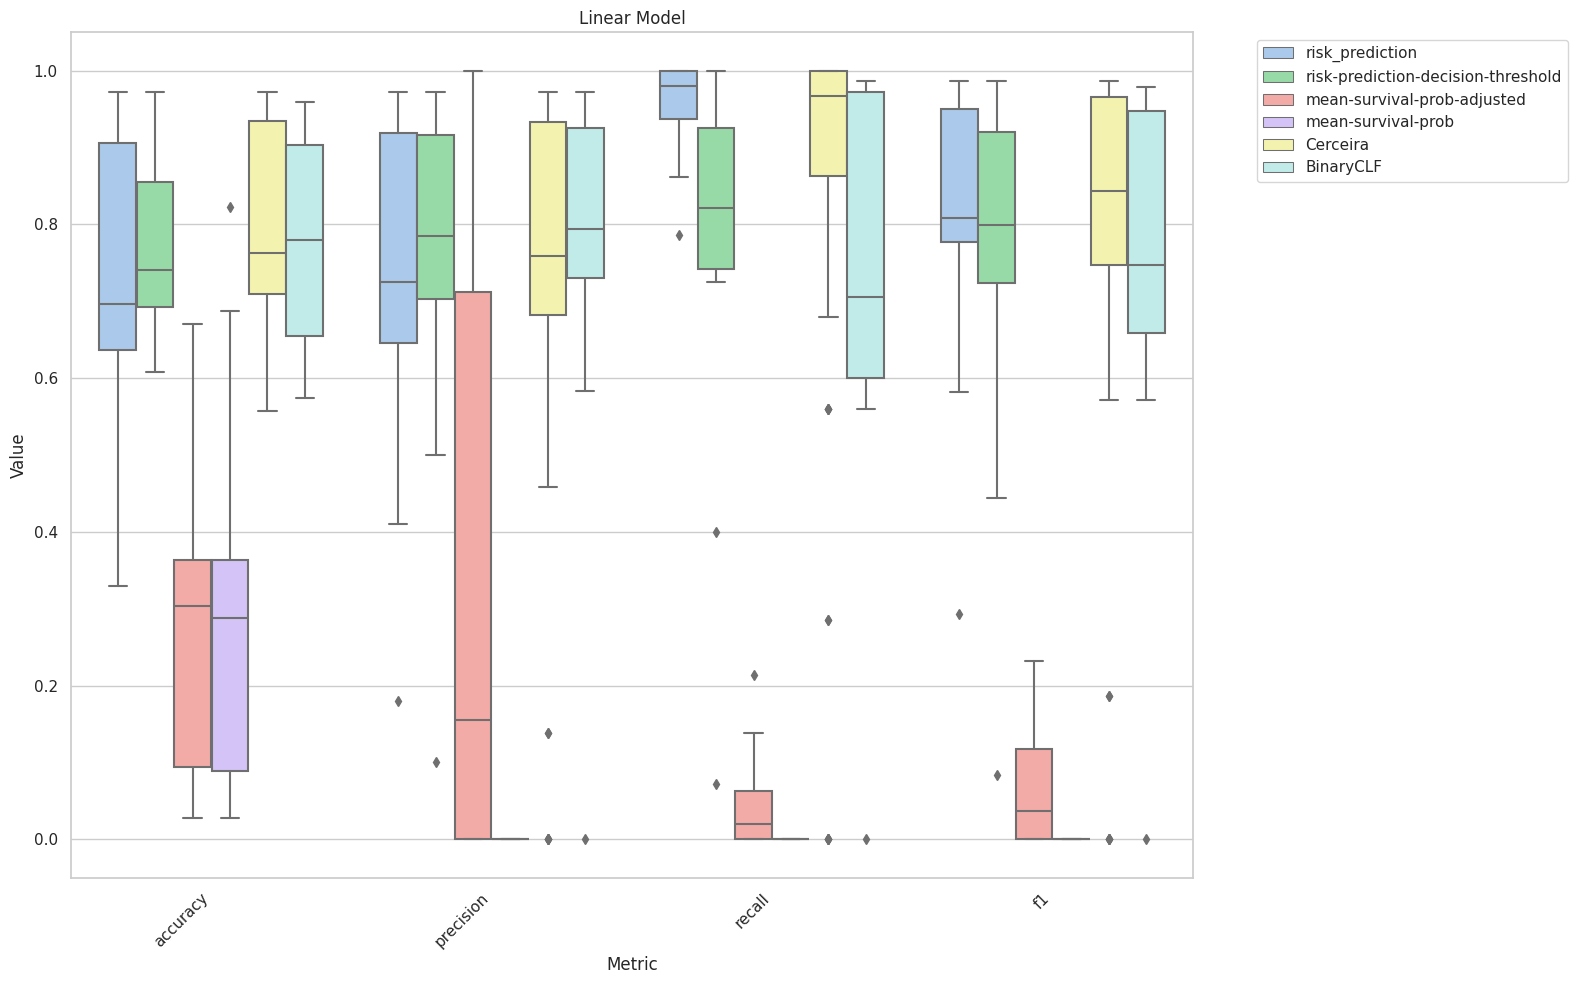

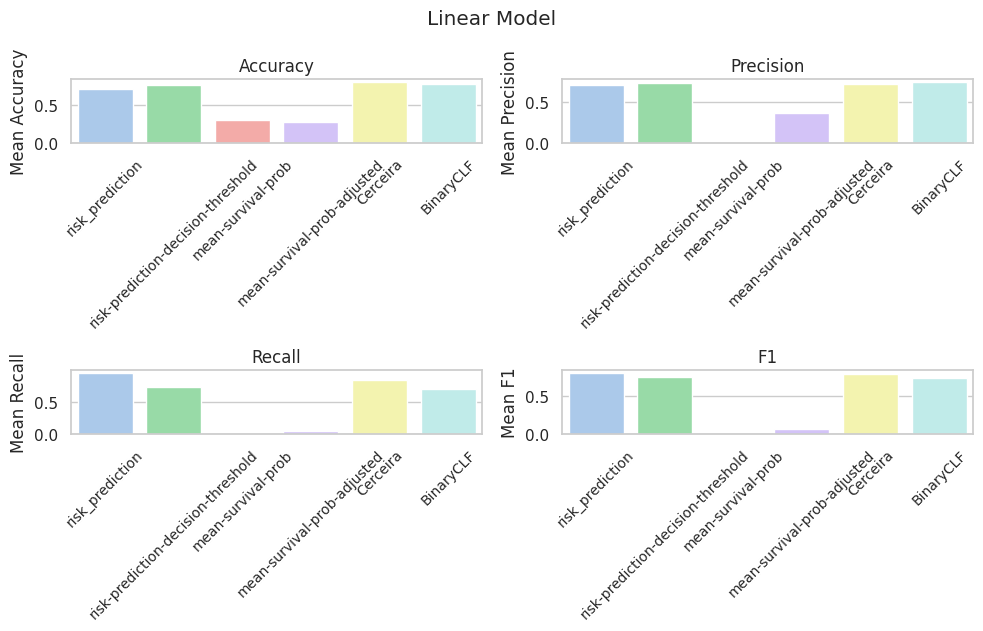

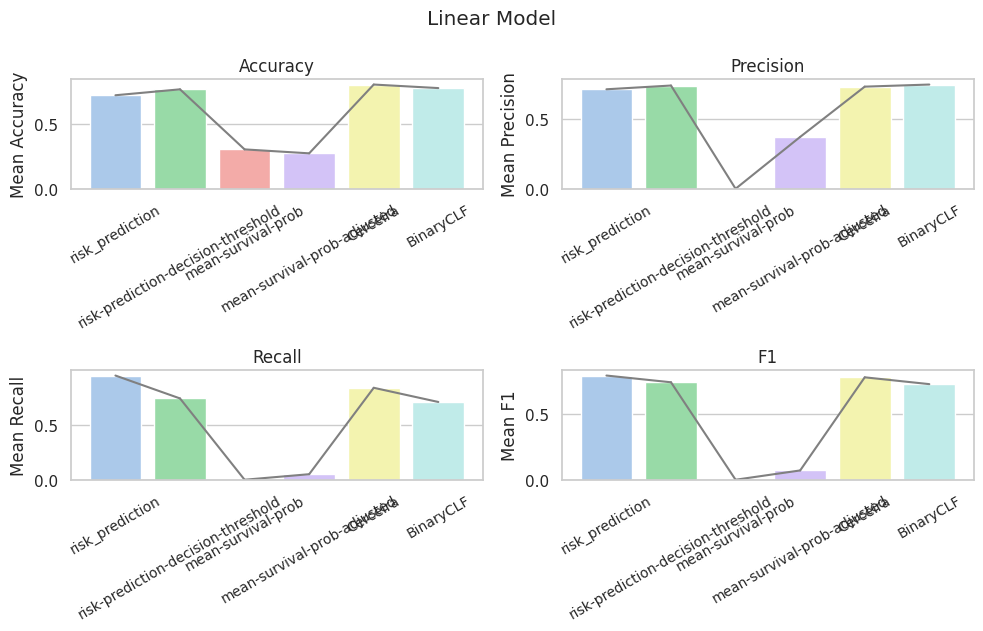

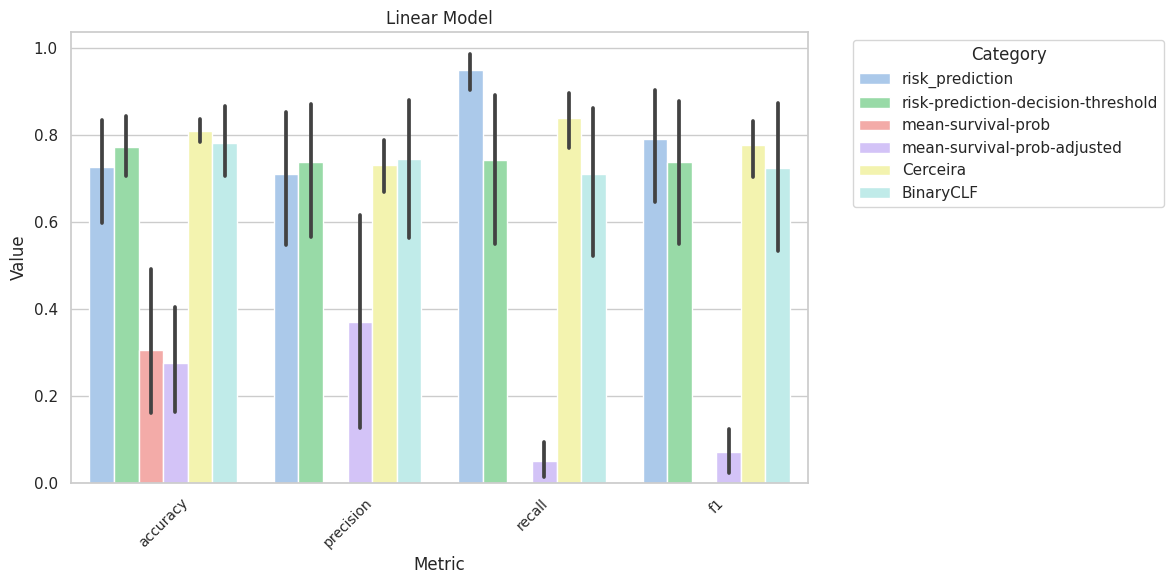

In [23]:
create_boxplot(metrics, path, type_of_model)
create_barchart(metrics, desired_order, path, type_of_model)
create_barchart_with_line(metrics, desired_order, path, type_of_model)
mean_values_barcharts(metrics, path, desired_order=desired_order)

In [83]:
for name, values in survival_analysis_ready_data.items():

        validation_rows = round(values.shape[0]*test_size)

        new_df = values

        print(new_df[-validation_rows:])
        print(new_df[:-validation_rows])

        # print(len(new_df[-validation_rows:]['extreme_event'].unique()) == 2)
        # print(len(new_df[:validation_rows]['extreme_event'].unique()) == 2)
        print('\n')

     lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  lag_9  lag_10  \
307     87    128     87     91     81     83    103     97     70      99   
308    128     87     91     81     83    103     97     70     99      70   
309     87     91     81     83    103     97     70     99     70      93   
310     91     81     83    103     97     70     99     70     93     125   
311     81     83    103     97     70     99     70     93    125     126   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
379    129    148    136    168    164    150    206    238    148     171   
380    148    136    168    164    150    206    238    148    171     170   
381    136    168    164    150    206    238    148    171    170     180   
382    168    164    150    206    238    148    171    170    180     331   
383    164    150    206    238    148    171    170    180    331     342   

     real_value  extreme_event start_date  stop_date   duration

In [3]:
!python --version

Python 3.10.12
